In [1]:
# we use Electric vehicle dataset 

In [2]:
# first we have to select vehicle to produce ?

In [3]:
# import some important libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
# this code is used to display all the columns of dataframe.
pd.set_option("display.max_columns",None)

In [5]:
# loading dataset
df_2021=pd.read_excel("state_wise_EV_2021.xlsx",header=3)
df_2022=pd.read_excel("state_wise_EV_2022.xlsx",header=3)
df_2023=pd.read_excel("state_wise_EV_2023.xlsx",header=3)
df_2024=pd.read_excel("state_wise_EV_2024.xlsx",header=3)

In [6]:
df_2021.sample(4)

Unnamed: 0        Unnamed: 1  2WIC    2WN 2WT  3WN  3WT  4WIC  HGV  HMV  \
24          25        PUDUCHERRY     0    392   0    0    4     0    0    0   
19          20           MANIPUR     0     20   0    0   94     0    0    0   
23          24            ODISHA     0  4,941   2    0  623     0    0    0   
11          12  HIMACHAL PRADESH     0    304   0    1   10     0    0    0   

    HPV  LGV LMV  LPV  MGV  MMV  MPV  OTH Unnamed: 18  
24    0    0   9    0    0    0    0    0         405  
19    0    0   0    0    0    0    0    0         114  
23    0    0  57    3    0    0    0    0       5,626  
11    0    0  11    0    0    0    0    0         326

In [7]:
# rename the unappropriate columns names
df_2021.rename(columns={"Unnamed: 0":"S.No.","Unnamed: 1":"State","Unnamed: 18":"Total"},inplace=True)


In [8]:
# try to know something about datasets
df_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No.   33 non-null     int64 
 1   State   33 non-null     object
 2   2WIC    33 non-null     int64 
 3   2WN     33 non-null     object
 4   2WT     33 non-null     object
 5   3WN     33 non-null     int64 
 6   3WT     33 non-null     object
 7   4WIC    33 non-null     int64 
 8   HGV     33 non-null     int64 
 9   HMV     33 non-null     int64 
 10  HPV     33 non-null     int64 
 11  LGV     33 non-null     int64 
 12  LMV     33 non-null     object
 13  LPV     33 non-null     int64 
 14  MGV     33 non-null     int64 
 15  MMV     33 non-null     int64 
 16  MPV     33 non-null     int64 
 17  OTH     33 non-null     int64 
 18  Total   33 non-null     object
dtypes: int64(13), object(6)
memory usage: 5.0+ KB


# Detail about columns full name
2WIC: 2-Wheeler, Internal Combustion Engine (IC) <br>
2WN: 2-Wheeler, Non-Transport<br>
2WT: 2-Wheeler, Transport<br>
3WN: 3-Wheeler, Non-Transport <br>
3WT: 3-Wheeler, Transport<br>
4WIC: 4-Wheeler, Internal Combustion Engine (IC) <br>
HGV: Heavy Goods Vehicle <br>
HMV: Heavy Motor Vehicle <br>
HPV: Heavy Passenger Vehicle <br>
LGV: Light Goods Vehicle <br>
LMV: Light Motor Vehicle <br>
LPV: Light Passenger Vehicle <br>
MGV: Medium Goods Vehicle <br>
MMV: Medium Motor Vehicle <br>
MPV: Medium Passenger Vehicle <br>

In [9]:
df_2021.isnull().sum()

S.No.    0
State    0
2WIC     0
2WN      0
2WT      0
3WN      0
3WT      0
4WIC     0
HGV      0
HMV      0
HPV      0
LGV      0
LMV      0
LPV      0
MGV      0
MMV      0
MPV      0
OTH      0
Total    0
dtype: int64

In [208]:
# Here we notice we have multiples non interger data type so we try to convert this type to integer type if possible.

In [10]:
l=df_2021.columns

In [11]:
l

Index(['S.No.', 'State', '2WIC', '2WN', '2WT', '3WN', '3WT', '4WIC', 'HGV',
       'HMV', 'HPV', 'LGV', 'LMV', 'LPV', 'MGV', 'MMV', 'MPV', 'OTH', 'Total'],
      dtype='object')

In [12]:
string_feature=[]
for i in l:
    if df_2021[i].dtype=="int64":
        pass
    else:
        string_feature.append(i)

In [13]:
# listing the non integer features

In [14]:
string_feature

['State', '2WN', '2WT', '3WT', 'LMV', 'Total']

In [15]:
# we take a look for each non integer columns is there any problem if we convert it to integer.

In [16]:
df_2021["2WN"].value_counts()

2WN
0         2
2         2
20        2
6         1
6,289     1
1,210     1
3         1
23,936    1
13,954    1
3,271     1
392       1
4,941     1
1         1
23,672    1
5,102     1
5,850     1
7,904     1
27,832    1
1,672     1
1,130     1
304       1
3,788     1
7,883     1
848       1
7,559     1
2,631     1
197       1
2,789     1
377       1
915       1
Name: count, dtype: int64

In [17]:
# I notice that this features can convert into integer if we replace "," to "".

In [18]:
df_2021["2WT"].value_counts()

2WT
0        27
2         2
5         1
1,789     1
30        1
6         1
Name: count, dtype: int64

In [19]:
df_2021["3WT"].value_counts()

3WT
0         5
30        1
1,178     1
60,125    1
3,982     1
2,425     1
4,258     1
8,936     1
1,335     1
4         1
623       1
2         1
94        1
1,937     1
4,326     1
2,136     1
198       1
2,019     1
11        1
10        1
4,806     1
750       1
14        1
16,248    1
1,510     1
386       1
20,206    1
15,247    1
5,158     1
Name: count, dtype: int64

In [20]:
df_2021["LMV"].value_counts()

LMV
0        5
3        2
5        2
21       1
1,648    1
74       1
117      1
933      1
544      1
32       1
9        1
57       1
3,687    1
182      1
36       1
1,369    1
399      1
11       1
50       1
830      1
189      1
1,532    1
68       1
111      1
60       1
7        1
317      1
Name: count, dtype: int64

In [21]:
df_2021["Total"].value_counts()

Total
2         2
92        1
10,438    1
66,708    1
5,324     1
29        1
2,434     1
30,030    1
23,464    1
4,643     1
405       1
5,626     1
1         1
5         1
114       1
29,914    1
6         1
9,688     1
8,734     1
33,304    1
3,741     1
1,146     1
326       1
8,660     1
9,765     1
1,096     1
25,815    1
4,215     1
734       1
23,083    1
15,632    1
6,409     1
Name: count, dtype: int64

In [22]:
string_feature[1:]

['2WN', '2WT', '3WT', 'LMV', 'Total']

In [23]:
# here i replace "," to ""
for i in string_feature[1:]:
    df_2021[i]=df_2021[i].str.replace(",","").astype(int)

In [24]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No.   33 non-null     int64 
 1   State   33 non-null     object
 2   2WIC    33 non-null     int64 
 3   2WN     33 non-null     int32 
 4   2WT     33 non-null     int32 
 5   3WN     33 non-null     int64 
 6   3WT     33 non-null     int32 
 7   4WIC    33 non-null     int64 
 8   HGV     33 non-null     int64 
 9   HMV     33 non-null     int64 
 10  HPV     33 non-null     int64 
 11  LGV     33 non-null     int64 
 12  LMV     33 non-null     int32 
 13  LPV     33 non-null     int64 
 14  MGV     33 non-null     int64 
 15  MMV     33 non-null     int64 
 16  MPV     33 non-null     int64 
 17  OTH     33 non-null     int64 
 18  Total   33 non-null     int32 
dtypes: int32(5), int64(13), object(1)
memory usage: 4.4+ KB


In [25]:
df_2021.isnull().sum()

S.No.    0
State    0
2WIC     0
2WN      0
2WT      0
3WN      0
3WT      0
4WIC     0
HGV      0
HMV      0
HPV      0
LGV      0
LMV      0
LPV      0
MGV      0
MMV      0
MPV      0
OTH      0
Total    0
dtype: int64

In [26]:
df_2021

S.No.                     State  2WIC    2WN   2WT  3WN    3WT  4WIC  HGV  \
0       1  ANDAMAN & NICOBAR ISLAND     0      0     0    0     30     0    0   
1       2            ANDHRA PRADESH     0   7904     2  165    198     0    0   
2       3         ARUNACHAL PRADESH     0      2     0    0      0     0    0   
3       4                     ASSAM     0    377     0    0  15247     0    0   
4       5                     BIHAR     0   2789     0    0  20206     0    0   
5       6                CHANDIGARH     0    197     0    0    386     0    0   
6       7              CHHATTISGARH     0   2631     0    4   1510     0    0   
7       8                     DELHI     0   7559     0    0  16248     0    0   
8       9                       GOA     0    848     0    0     14     0    0   
9      10                   GUJARAT     1   7883     0    3    750     2    0   
10     11                   HARYANA     0   3788     5    0   4806     0    0   
11     12          HIMACHAL PRADESH     0    304     0    1     10     0    0   
12     13         JAMMU AND KASHMIR     0   1130     0    0     11     0    0   
13     14                 JHARKHAND     0   1672     0    0   2019     0    0   
14     15                 KARNATAKA     1  27832  1789   10   2136     0    0   
15     16                    KERALA     1   5850    30   18   1178     1    0   
16     17                    LADAKH     0      6     0    0      0     0    0   
17     18            MADHYA PRADESH     0   5102     0    0   4326     0    0   
18     19               MAHARASHTRA     2  23672     0    1   1937     0    0   
19     20                   MANIPUR     0     20     0    0     94     0    0   
20     21                 MEGHALAYA     0      0     0    0      2     0    0   
21     22                   MIZORAM     0      1     0    0      0     0    0   
22     23                  NAGALAND     0      2     0    0      0     0    0   
23     24                    ODISHA     0   4941     2    0    623     0    0   
24     25                PUDUCHERRY     0    392     0    0      4     0    0   
25     26                    PUNJAB     0   3271     0    0   1335     0    0   
26     27                 RAJASTHAN     0  13954     6    0   8936     0    0   
27     28                TAMIL NADU     1  23936     0    5   4258     0    0   
28     29                   TRIPURA     0      3     0    0   2425     0    0   
29     30          UT OF DNH AND DD     0     20     0    0      0     0    0   
30     31               UTTARAKHAND     0   1210     0    0   3982     0    0   
31     32             UTTAR PRADESH     0   6289     0    0  60125     0    0   
32     33               WEST BENGAL     0    915     0    0   5158     0    0   

    HMV  HPV  LGV   LMV  LPV  MGV  MMV  MPV  OTH  Total  
0     0   40    0    21    1    0    0    0    0     92  
1     0    0   97   399    0    0    0    0  923   9688  
2     0    0    0     0    0    0    0    0    0      2  
3     0    0    1     7    0    0    0    0    0  15632  
4     0   26    1    60    1    0    0    0    0  23083  
5     0   40    0   111    0    0    0    0    0    734  
6     0    0    0    68    2    0    0    0    0   4215  
7     0   30   19  1532  426    0    0    1    0  25815  
8     0   35   10   189    0    0    0    0    0   1096  
9     0  157    0   830   33    0    0   60   46   9765  
10    0    0    1    50   10    0    0    0    0   8660  
11    0    0    0    11    0    0    0    0    0    326  
12    0    0    0     5    0    0    0    0    0   1146  
13    0    0    2    36   12    0    0    0    0   3741  
14    0   27   32  1369  108    0    0    0    0  33304  
15    0    0    0  1648    8    0    0    0    0   8734  
16    0    0    0     0    0    0    0    0    0      6  
17    0    0    0   182   10    0    0    0  818  10438  
18    0  359    1  3687   62    0    0  193    0  29914  
19    0    0    0     0    0    0    0    0    0    114  
20    0    0    0     3    0   

In [27]:
# l[2:]

In [28]:
df_2021

S.No.                     State  2WIC    2WN   2WT  3WN    3WT  4WIC  HGV  \
0       1  ANDAMAN & NICOBAR ISLAND     0      0     0    0     30     0    0   
1       2            ANDHRA PRADESH     0   7904     2  165    198     0    0   
2       3         ARUNACHAL PRADESH     0      2     0    0      0     0    0   
3       4                     ASSAM     0    377     0    0  15247     0    0   
4       5                     BIHAR     0   2789     0    0  20206     0    0   
5       6                CHANDIGARH     0    197     0    0    386     0    0   
6       7              CHHATTISGARH     0   2631     0    4   1510     0    0   
7       8                     DELHI     0   7559     0    0  16248     0    0   
8       9                       GOA     0    848     0    0     14     0    0   
9      10                   GUJARAT     1   7883     0    3    750     2    0   
10     11                   HARYANA     0   3788     5    0   4806     0    0   
11     12          HIMACHAL PRADESH     0    304     0    1     10     0    0   
12     13         JAMMU AND KASHMIR     0   1130     0    0     11     0    0   
13     14                 JHARKHAND     0   1672     0    0   2019     0    0   
14     15                 KARNATAKA     1  27832  1789   10   2136     0    0   
15     16                    KERALA     1   5850    30   18   1178     1    0   
16     17                    LADAKH     0      6     0    0      0     0    0   
17     18            MADHYA PRADESH     0   5102     0    0   4326     0    0   
18     19               MAHARASHTRA     2  23672     0    1   1937     0    0   
19     20                   MANIPUR     0     20     0    0     94     0    0   
20     21                 MEGHALAYA     0      0     0    0      2     0    0   
21     22                   MIZORAM     0      1     0    0      0     0    0   
22     23                  NAGALAND     0      2     0    0      0     0    0   
23     24                    ODISHA     0   4941     2    0    623     0    0   
24     25                PUDUCHERRY     0    392     0    0      4     0    0   
25     26                    PUNJAB     0   3271     0    0   1335     0    0   
26     27                 RAJASTHAN     0  13954     6    0   8936     0    0   
27     28                TAMIL NADU     1  23936     0    5   4258     0    0   
28     29                   TRIPURA     0      3     0    0   2425     0    0   
29     30          UT OF DNH AND DD     0     20     0    0      0     0    0   
30     31               UTTARAKHAND     0   1210     0    0   3982     0    0   
31     32             UTTAR PRADESH     0   6289     0    0  60125     0    0   
32     33               WEST BENGAL     0    915     0    0   5158     0    0   

    HMV  HPV  LGV   LMV  LPV  MGV  MMV  MPV  OTH  Total  
0     0   40    0    21    1    0    0    0    0     92  
1     0    0   97   399    0    0    0    0  923   9688  
2     0    0    0     0    0    0    0    0    0      2  
3     0    0    1     7    0    0    0    0    0  15632  
4     0   26    1    60    1    0    0    0    0  23083  
5     0   40    0   111    0    0    0    0    0    734  
6     0    0    0    68    2    0    0    0    0   4215  
7     0   30   19  1532  426    0    0    1    0  25815  
8     0   35   10   189    0    0    0    0    0   1096  
9     0  157    0   830   33    0    0   60   46   9765  
10    0    0    1    50   10    0    0    0    0   8660  
11    0    0    0    11    0    0    0    0    0    326  
12    0    0    0     5    0    0    0    0    0   1146  
13    0    0    2    36   12    0    0    0    0   3741  
14    0   27   32  1369  108    0    0    0    0  33304  
15    0    0    0  1648    8    0    0    0    0   8734  
16    0    0    0     0    0    0    0    0    0      6  
17    0    0    0   182   10    0    0    0  818  10438  
18    0  359    1  3687   62    0    0  193    0  29914  
19    0    0    0     0    0    0    0    0    0    114  
20    0    0    0     3    0   

In [29]:
df_2021_T=df_2021.T

In [30]:
df_2021_T

0               1                  2      3   \
S.No.                         1               2                  3      4   
State  ANDAMAN & NICOBAR ISLAND  ANDHRA PRADESH  ARUNACHAL PRADESH  ASSAM   
2WIC                          0               0                  0      0   
2WN                           0            7904                  2    377   
2WT                           0               2                  0      0   
3WN                           0             165                  0      0   
3WT                          30             198                  0  15247   
4WIC                          0               0                  0      0   
HGV                           0               0                  0      0   
HMV                           0               0                  0      0   
HPV                          40               0                  0      0   
LGV                           0              97                  0      1   
LMV                          21             399                  0      7   
LPV                           1               0                  0      0   
MGV                           0               0                  0      0   
MMV                           0               0                  0      0   
MPV                           0               0                  0      0   
OTH                           0             923                  0      0   
Total                        92            9688                  2  15632   

          4           5             6      7     8        9        10  \
S.No.      5           6             7      8     9       10       11   
State  BIHAR  CHANDIGARH  CHHATTISGARH  DELHI   GOA  GUJARAT  HARYANA   
2WIC       0           0             0      0     0        1        0   
2WN     2789         197          2631   7559   848     7883     3788   
2WT        0           0             0      0     0        0        5   
3WN        0           0             4      0     0        3        0   
3WT    20206         386          1510  16248    14      750     4806   
4WIC       0           0             0      0     0        2        0   
HGV        0           0             0      0     0        0        0   
HMV        0           0             0      0     0        0        0   
HPV       26          40             0     30    35      157        0   
LGV        1           0             0     19    10        0        1   
LMV       60         111            68   1532   189      830       50   
LPV        1           0             2    426     0       33       10   
MGV        0           0             0      0     0        0        0   
MMV        0           0             0      0     0        0        0   
MPV        0           0             0      1     0       60        0   
OTH        0           0             0      0     0       46        0   
Total  23083         734          4215  25815  1096     9765     8660   

                     11                 12         13         14      15  \
S.No.                12                 13         14         15      16   
State  HIMACHAL PRADESH  JAMMU AND KASHMIR  JHARKHAND  KARNATAKA  KERALA   
2WIC                  0                  0          0          1       1   
2WN                 304               1130       1672      27832    5850   
2WT                   0                  0          0       1789      30   
3WN                   1                  0          0         10      18   
3WT                  10                 11       2019       2136    1178   
4WIC                  0                  0          0          0       1   
HGV                   0                  0          0          0       0   
HMV                   0                  0          0          0       0   
HPV                   0                  0          0         27       0   
LGV                   0                  0          2         32       0   
LMV                  11                

In [31]:
df_2021_new_columns_name=df_2021["State"].values

In [32]:
old_cols=df_2021_T.columns

In [33]:
df_2021_T.columns=df_2021_new_columns_name

In [34]:
df_2021_T.drop(index=["S.No.","State"],inplace=True)

In [35]:
df_2021_T

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                         0              0                 0      0      0   
2WN                          0           7904                 2    377   2789   
2WT                          0              2                 0      0      0   
3WN                          0            165                 0      0      0   
3WT                         30            198                 0  15247  20206   
4WIC                         0              0                 0      0      0   
HGV                          0              0                 0      0      0   
HMV                          0              0                 0      0      0   
HPV                         40              0                 0      0     26   
LGV                          0             97                 0      1      1   
LMV                         21            399                 0      7     60   
LPV                          1              0                 0      0      1   
MGV                          0              0                 0      0      0   
MMV                          0              0                 0      0      0   
MPV                          0              0                 0      0      0   
OTH                          0            923                 0      0      0   
Total                       92           9688                 2  15632  23083   

      CHANDIGARH CHHATTISGARH  DELHI   GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC           0            0      0     0       1       0                0   
2WN          197         2631   7559   848    7883    3788              304   
2WT            0            0      0     0       0       5                0   
3WN            0            4      0     0       3       0                1   
3WT          386         1510  16248    14     750    4806               10   
4WIC           0            0      0     0       2       0                0   
HGV            0            0      0     0       0       0                0   
HMV            0            0      0     0       0       0                0   
HPV           40            0     30    35     157       0                0   
LGV            0            0     19    10       0       1                0   
LMV          111           68   1532   189     830      50               11   
LPV            0            2    426     0      33      10                0   
MGV            0            0      0     0       0       0                0   
MMV            0            0      0     0       0       0                0   
MPV            0            0      1     0      60       0                0   
OTH            0            0      0     0      46       0                0   
Total        734         4215  25815  1096    9765    8660              326   

      JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                  0         0         1      1      0              0   
2WN                1130      1672     27832   5850      6           5102   
2WT                   0         0      1789     30      0              0   
3WN                   0         0        10     18      0              0   
3WT                  11      2019      2136   1178      0           4326   
4WIC                  0         0         0      1      0              0   
HGV                   0         0         0      0      0              0   
HMV                   0         0         0      0      0              0   
HPV                   0         0        27      0      0              0   
LGV                   0         2        32      0      0              0   
LMV                   5        36      1369   1648      0            182   
LPV                   0        12       108      8      0             10   
MGV                   0         0         0      0      0              0   
MMV                   0         0         0      0      0   

In [36]:
df_2021_T_copy=df_2021_T.drop(index=["Total"])

In [37]:
df_2021_T_copy.head()

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                        0              0                 0      0      0   
2WN                         0           7904                 2    377   2789   
2WT                         0              2                 0      0      0   
3WN                         0            165                 0      0      0   
3WT                        30            198                 0  15247  20206   

     CHANDIGARH CHHATTISGARH  DELHI  GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC          0            0      0    0       1       0                0   
2WN         197         2631   7559  848    7883    3788              304   
2WT           0            0      0    0       0       5                0   
3WN           0            4      0    0       3       0                1   
3WT         386         1510  16248   14     750    4806               10   

     JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                 0         0         1      1      0              0   
2WN               1130      1672     27832   5850      6           5102   
2WT                  0         0      1789     30      0              0   
3WN                  0         0        10     18      0              0   
3WT                 11      2019      2136   1178      0           4326   

     MAHARASHTRA MANIPUR MEGHALAYA MIZORAM NAGALAND ODISHA PUDUCHERRY PUNJAB  \
2WIC           2       0         0       0        0      0          0      0   
2WN        23672      20         0       1        2   4941        392   3271   
2WT            0       0         0       0        0      2          0      0   
3WN            1       0         0       0        0      0          0      0   
3WT         1937      94         2       0        0    623          4   1335   

     RAJASTHAN TAMIL NADU TRIPURA UT OF DNH AND DD UTTARAKHAND UTTAR PRADESH  \
2WIC         0          1       0                0           0             0   
2WN      13954      23936       3               20        1210          6289   
2WT          6          0       0                0           0             0   
3WN          0          5       0                0           0             0   
3WT       8936       4258    2425                0        3982         60125   

     WEST BENGAL  
2WIC           0  
2WN          915  
2WT            0  
3WN            0  
3WT         5158

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sr=StandardScaler()

In [40]:
x_train_2021=sr.fit_transform(df_2021_T_copy)

In [41]:
from sklearn.cluster import KMeans

In [42]:
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x_train_2021)
    wcss.append(kmeans.inertia_)

In [43]:
wcss

[528.0,
 214.66470668316987,
 29.237229854251833,
 9.786169164271053,
 0.6132706369845201,
 0.15270213378635475,
 0.0873660014792098]

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

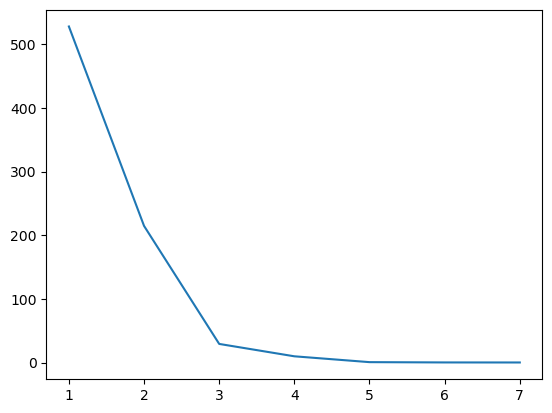

In [45]:
sns.lineplot(y=wcss,x=range(1,8))

In [46]:
kmeans=KMeans(n_clusters=3)

In [47]:
kmeans.fit(x_train_2021)

KMeans(n_clusters=3)

In [48]:
df_2021_T_copy["cluster"]=kmeans.labels_

In [49]:
df_2021_T_copy

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                        0              0                 0      0      0   
2WN                         0           7904                 2    377   2789   
2WT                         0              2                 0      0      0   
3WN                         0            165                 0      0      0   
3WT                        30            198                 0  15247  20206   
4WIC                        0              0                 0      0      0   
HGV                         0              0                 0      0      0   
HMV                         0              0                 0      0      0   
HPV                        40              0                 0      0     26   
LGV                         0             97                 0      1      1   
LMV                        21            399                 0      7     60   
LPV                         1              0                 0      0      1   
MGV                         0              0                 0      0      0   
MMV                         0              0                 0      0      0   
MPV                         0              0                 0      0      0   
OTH                         0            923                 0      0      0   

     CHANDIGARH CHHATTISGARH  DELHI  GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC          0            0      0    0       1       0                0   
2WN         197         2631   7559  848    7883    3788              304   
2WT           0            0      0    0       0       5                0   
3WN           0            4      0    0       3       0                1   
3WT         386         1510  16248   14     750    4806               10   
4WIC          0            0      0    0       2       0                0   
HGV           0            0      0    0       0       0                0   
HMV           0            0      0    0       0       0                0   
HPV          40            0     30   35     157       0                0   
LGV           0            0     19   10       0       1                0   
LMV         111           68   1532  189     830      50               11   
LPV           0            2    426    0      33      10                0   
MGV           0            0      0    0       0       0                0   
MMV           0            0      0    0       0       0                0   
MPV           0            0      1    0      60       0                0   
OTH           0            0      0    0      46       0                0   

     JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                 0         0         1      1      0              0   
2WN               1130      1672     27832   5850      6           5102   
2WT                  0         0      1789     30      0              0   
3WN                  0         0        10     18      0              0   
3WT                 11      2019      2136   1178      0           4326   
4WIC                 0         0         0      1      0              0   
HGV                  0         0         0      0      0              0   
HMV                  0         0         0      0      0              0   
HPV                  0         0        27      0      0              0   
LGV                  0         2        32      0      0              0   
LMV                  5        36      1369   1648      0            182   
LPV                  0        12       108      8      0             10   
MGV                  0         0         0      0      0              0   
MMV                  0         0         0      0      0              0   
MPV                  0         0         0      0      0              0   
OTH                  0         0         0      0      0            818   

     MAHARASHTRA MANIPUR MEGHALAYA MIZORAM NAGALAND ODISHA

Insight: We have segmented the 2021 dataset into three distinct clusters.

    Cluster 1: This cluster represents the second most demanded type of vehicle in India during the year 2021. It exhibits characteristics that align with a significant but not the highest level of demand within the market.(2WN)[Two wheeler non_Transport)
    
    Cluster 2: This cluster signifies the most demanded vehicle in India. It reflects the highest level of demand among all vehicle types considered in the dataset, indicating its popularity and widespread appeal among consumers. (3WT) [three wheeler Transport]
    
    Cluster 0: In contrast to the other clusters, Cluster 1 showcases a lack of interest from consumers in purchasing this particular product. It stands out as the least preferred option among the clusters, suggesting that it may face challenges in gaining traction or capturing market share compared to its counterparts.

In [ ]:
# I think directly doing cluster is not relevalent to cluster the vehicle type so we try another way of segmentation. 

In [ ]:
# but we get some insight from this cluster both 2WN and 3WT sales is good.

# Trying density

In [50]:
old_columns=df_2021.columns[2:-1]

In [51]:
old_columns

Index(['2WIC', '2WN', '2WT', '3WN', '3WT', '4WIC', 'HGV', 'HMV', 'HPV', 'LGV',
       'LMV', 'LPV', 'MGV', 'MMV', 'MPV', 'OTH'],
      dtype='object')

In [52]:
df_2021_d=df_2021.copy()

In [53]:
df_2021_d.head()

S.No.                     State  2WIC   2WN  2WT  3WN    3WT  4WIC  HGV  \
0      1  ANDAMAN & NICOBAR ISLAND     0     0    0    0     30     0    0   
1      2            ANDHRA PRADESH     0  7904    2  165    198     0    0   
2      3         ARUNACHAL PRADESH     0     2    0    0      0     0    0   
3      4                     ASSAM     0   377    0    0  15247     0    0   
4      5                     BIHAR     0  2789    0    0  20206     0    0   

   HMV  HPV  LGV  LMV  LPV  MGV  MMV  MPV  OTH  Total  
0    0   40    0   21    1    0    0    0    0     92  
1    0    0   97  399    0    0    0    0  923   9688  
2    0    0    0    0    0    0    0    0    0      2  
3    0    0    1    7    0    0    0    0    0  15632  
4    0   26    1   60    1    0    0    0    0  23083

In [54]:
for i in old_columns:
    df_2021_d[i]=(df_2021_d[i]*100)/df_2021_d["Total"]

In [55]:
df_2021_d_T=df_2021_d.T

In [56]:
df_2021_d_T

0               1                  2          3   \
S.No.                         1               2                  3          4   
State  ANDAMAN & NICOBAR ISLAND  ANDHRA PRADESH  ARUNACHAL PRADESH      ASSAM   
2WIC                        0.0             0.0                0.0        0.0   
2WN                         0.0       81.585467              100.0    2.41172   
2WT                         0.0        0.020644                0.0        0.0   
3WN                         0.0        1.703138                0.0        0.0   
3WT                   32.608696        2.043765                0.0  97.537103   
4WIC                        0.0             0.0                0.0        0.0   
HGV                         0.0             0.0                0.0        0.0   
HMV                         0.0             0.0                0.0        0.0   
HPV                   43.478261             0.0                0.0        0.0   
LGV                         0.0        1.001239                0.0   0.006397   
LMV                   22.826087        4.118497                0.0    0.04478   
LPV                    1.086957             0.0                0.0        0.0   
MGV                         0.0             0.0                0.0        0.0   
MMV                         0.0             0.0                0.0        0.0   
MPV                         0.0             0.0                0.0        0.0   
OTH                         0.0         9.52725                0.0        0.0   
Total                        92            9688                  2      15632   

              4           5             6          7          8          9   \
S.No.          5           6             7          8          9         10   
State      BIHAR  CHANDIGARH  CHHATTISGARH      DELHI        GOA    GUJARAT   
2WIC         0.0         0.0           0.0        0.0        0.0   0.010241   
2WN    12.082485   26.839237     62.419929  29.281426  77.372263  80.727087   
2WT          0.0         0.0           0.0        0.0        0.0        0.0   
3WN          0.0         0.0      0.094899        0.0        0.0   0.030722   
3WT    87.536282   52.588556     35.824437  62.940151   1.277372   7.680492   
4WIC         0.0         0.0           0.0        0.0        0.0   0.020481   
HGV          0.0         0.0           0.0        0.0        0.0        0.0   
HMV          0.0         0.0           0.0        0.0        0.0        0.0   
HPV     0.112637    5.449591           0.0   0.116212   3.193431   1.607783   
LGV     0.004332         0.0           0.0   0.073601   0.912409        0.0   
LMV     0.259932   15.122616      1.613286   5.934534  17.244526   8.499744   
LPV     0.004332         0.0       0.04745   1.650203        0.0   0.337942   
MGV          0.0         0.0           0.0        0.0        0.0        0.0   
MMV          0.0         0.0           0.0        0.0        0.0        0.0   
MPV          0.0         0.0           0.0   0.003874        0.0   0.614439   
OTH          0.0         0.0           0.0        0.0        0.0    0.47107   
Total      23083         734          4215      25815       1096       9765   

              10                11                 12         13         14  \
S.No.         11                12                 13         14         15   
State    HARYANA  HIMACHAL PRADESH  JAMMU AND KASHMIR  JHARKHAND  KARNATAKA   
2WIC         0.0               0.0                0.0        0.0   0.003003   
2WN    43.741339         93.251534          98.603839  44.693932  83.569541   
2WT     0.057737               0.0                0.0        0.0   5.371727   
3WN          0.0          0.306748                0.0        0.0   0.030026   
3WT    55.496536          3.067485            0.95986  53.969527   6.413644   
4WIC         0.0               0.0                0.0        0.0        0.0   
HGV          0.0               0.0                0.0        0.0        0.0   
HMV          0.0               0.0   

In [57]:
df_2021_d_T.drop(index=["S.No."])

0               1                  2          3   \
State  ANDAMAN & NICOBAR ISLAND  ANDHRA PRADESH  ARUNACHAL PRADESH      ASSAM   
2WIC                        0.0             0.0                0.0        0.0   
2WN                         0.0       81.585467              100.0    2.41172   
2WT                         0.0        0.020644                0.0        0.0   
3WN                         0.0        1.703138                0.0        0.0   
3WT                   32.608696        2.043765                0.0  97.537103   
4WIC                        0.0             0.0                0.0        0.0   
HGV                         0.0             0.0                0.0        0.0   
HMV                         0.0             0.0                0.0        0.0   
HPV                   43.478261             0.0                0.0        0.0   
LGV                         0.0        1.001239                0.0   0.006397   
LMV                   22.826087        4.118497                0.0    0.04478   
LPV                    1.086957             0.0                0.0        0.0   
MGV                         0.0             0.0                0.0        0.0   
MMV                         0.0             0.0                0.0        0.0   
MPV                         0.0             0.0                0.0        0.0   
OTH                         0.0         9.52725                0.0        0.0   
Total                        92            9688                  2      15632   

              4           5             6          7          8          9   \
State      BIHAR  CHANDIGARH  CHHATTISGARH      DELHI        GOA    GUJARAT   
2WIC         0.0         0.0           0.0        0.0        0.0   0.010241   
2WN    12.082485   26.839237     62.419929  29.281426  77.372263  80.727087   
2WT          0.0         0.0           0.0        0.0        0.0        0.0   
3WN          0.0         0.0      0.094899        0.0        0.0   0.030722   
3WT    87.536282   52.588556     35.824437  62.940151   1.277372   7.680492   
4WIC         0.0         0.0           0.0        0.0        0.0   0.020481   
HGV          0.0         0.0           0.0        0.0        0.0        0.0   
HMV          0.0         0.0           0.0        0.0        0.0        0.0   
HPV     0.112637    5.449591           0.0   0.116212   3.193431   1.607783   
LGV     0.004332         0.0           0.0   0.073601   0.912409        0.0   
LMV     0.259932   15.122616      1.613286   5.934534  17.244526   8.499744   
LPV     0.004332         0.0       0.04745   1.650203        0.0   0.337942   
MGV          0.0         0.0           0.0        0.0        0.0        0.0   
MMV          0.0         0.0           0.0        0.0        0.0        0.0   
MPV          0.0         0.0           0.0   0.003874        0.0   0.614439   
OTH          0.0         0.0           0.0        0.0        0.0    0.47107   
Total      23083         734          4215      25815       1096       9765   

              10                11                 12         13         14  \
State    HARYANA  HIMACHAL PRADESH  JAMMU AND KASHMIR  JHARKHAND  KARNATAKA   
2WIC         0.0               0.0                0.0        0.0   0.003003   
2WN    43.741339         93.251534          98.603839  44.693932  83.569541   
2WT     0.057737               0.0                0.0        0.0   5.371727   
3WN          0.0          0.306748                0.0        0.0   0.030026   
3WT    55.496536          3.067485            0.95986  53.969527   6.413644   
4WIC         0.0               0.0                0.0        0.0        0.0   
HGV          0.0               0.0                0.0        0.0        0.0   
HMV          0.0               0.0                0.0        0.0        0.0   
HPV          0.0               0.0                0.0        0.0   0.081071   
LGV     0.011547               0.0                0.0   0.053462   0.096085   
LMV     0.577367          3.374233     

In [58]:
header=df_2021.State

In [59]:
df_2021_d_T.rename(columns=header,inplace=True)

In [60]:
df_2021_d_T.head(4)

ANDAMAN & NICOBAR ISLAND  ANDHRA PRADESH  ARUNACHAL PRADESH    ASSAM  \
S.No.                         1               2                  3        4   
State  ANDAMAN & NICOBAR ISLAND  ANDHRA PRADESH  ARUNACHAL PRADESH    ASSAM   
2WIC                        0.0             0.0                0.0      0.0   
2WN                         0.0       81.585467              100.0  2.41172   

           BIHAR  CHANDIGARH  CHHATTISGARH      DELHI        GOA    GUJARAT  \
S.No.          5           6             7          8          9         10   
State      BIHAR  CHANDIGARH  CHHATTISGARH      DELHI        GOA    GUJARAT   
2WIC         0.0         0.0           0.0        0.0        0.0   0.010241   
2WN    12.082485   26.839237     62.419929  29.281426  77.372263  80.727087   

         HARYANA  HIMACHAL PRADESH  JAMMU AND KASHMIR  JHARKHAND  KARNATAKA  \
S.No.         11                12                 13         14         15   
State    HARYANA  HIMACHAL PRADESH  JAMMU AND KASHMIR  JHARKHAND  KARNATAKA   
2WIC         0.0               0.0                0.0        0.0   0.003003   
2WN    43.741339         93.251534          98.603839  44.693932  83.569541   

         KERALA  LADAKH  MADHYA PRADESH  MAHARASHTRA   MANIPUR  MEGHALAYA  \
S.No.        16      17              18           19        20         21   
State    KERALA  LADAKH  MADHYA PRADESH  MAHARASHTRA   MANIPUR  MEGHALAYA   
2WIC    0.01145     0.0             0.0     0.006686       0.0        0.0   
2WN    66.97962   100.0       48.879096    79.133516  17.54386        0.0   

       MIZORAM  NAGALAND     ODISHA  PUDUCHERRY    PUNJAB  RAJASTHAN  \
S.No.       22        23         24          25        26         27   
State  MIZORAM  NAGALAND     ODISHA  PUDUCHERRY    PUNJAB  RAJASTHAN   
2WIC       0.0       0.0        0.0         0.0       0.0        0.0   
2WN      100.0     100.0  87.824387   96.790123  70.45014  59.469826   

       TAMIL NADU   TRIPURA  UT OF DNH AND DD  UTTARAKHAND  UTTAR PRADESH  \
S.No.          28        29                30           31             32   
State  TAMIL NADU   TRIPURA  UT OF DNH AND DD  UTTARAKHAND  UTTAR PRADESH   
2WIC      0.00333       0.0               0.0          0.0            0.0   
2WN      79.70696  0.123254         68.965517    22.727273       9.427655   

       WEST BENGAL  
S.No.           33  
State  WEST BENGAL  
2WIC           0.0  
2WN      14.276798

In [61]:
df_2021_d_T.drop(index=["S.No.","State","Total"],inplace=True)

In [62]:
df_2021_d_T

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH      ASSAM  \
2WIC                      0.0            0.0               0.0        0.0   
2WN                       0.0      81.585467             100.0    2.41172   
2WT                       0.0       0.020644               0.0        0.0   
3WN                       0.0       1.703138               0.0        0.0   
3WT                 32.608696       2.043765               0.0  97.537103   
4WIC                      0.0            0.0               0.0        0.0   
HGV                       0.0            0.0               0.0        0.0   
HMV                       0.0            0.0               0.0        0.0   
HPV                 43.478261            0.0               0.0        0.0   
LGV                       0.0       1.001239               0.0   0.006397   
LMV                 22.826087       4.118497               0.0    0.04478   
LPV                  1.086957            0.0               0.0        0.0   
MGV                       0.0            0.0               0.0        0.0   
MMV                       0.0            0.0               0.0        0.0   
MPV                       0.0            0.0               0.0        0.0   
OTH                       0.0        9.52725               0.0        0.0   

          BIHAR CHANDIGARH CHHATTISGARH      DELHI        GOA    GUJARAT  \
2WIC        0.0        0.0          0.0        0.0        0.0   0.010241   
2WN   12.082485  26.839237    62.419929  29.281426  77.372263  80.727087   
2WT         0.0        0.0          0.0        0.0        0.0        0.0   
3WN         0.0        0.0     0.094899        0.0        0.0   0.030722   
3WT   87.536282  52.588556    35.824437  62.940151   1.277372   7.680492   
4WIC        0.0        0.0          0.0        0.0        0.0   0.020481   
HGV         0.0        0.0          0.0        0.0        0.0        0.0   
HMV         0.0        0.0          0.0        0.0        0.0        0.0   
HPV    0.112637   5.449591          0.0   0.116212   3.193431   1.607783   
LGV    0.004332        0.0          0.0   0.073601   0.912409        0.0   
LMV    0.259932  15.122616     1.613286   5.934534  17.244526   8.499744   
LPV    0.004332        0.0      0.04745   1.650203        0.0   0.337942   
MGV         0.0        0.0          0.0        0.0        0.0        0.0   
MMV         0.0        0.0          0.0        0.0        0.0        0.0   
MPV         0.0        0.0          0.0   0.003874        0.0   0.614439   
OTH         0.0        0.0          0.0        0.0        0.0    0.47107   

        HARYANA HIMACHAL PRADESH JAMMU AND KASHMIR  JHARKHAND  KARNATAKA  \
2WIC        0.0              0.0               0.0        0.0   0.003003   
2WN   43.741339        93.251534         98.603839  44.693932  83.569541   
2WT    0.057737              0.0               0.0        0.0   5.371727   
3WN         0.0         0.306748               0.0        0.0   0.030026   
3WT   55.496536         3.067485           0.95986  53.969527   6.413644   
4WIC        0.0              0.0               0.0        0.0        0.0   
HGV         0.0              0.0               0.0        0.0        0.0   
HMV         0.0              0.0               0.0        0.0        0.0   
HPV         0.0              0.0               0.0        0.0   0.081071   
LGV    0.011547              0.0               0.0   0.053462   0.096085   
LMV    0.577367         3.374233            0.4363    0.96231   4.110617   
LPV    0.115473              0.0               0.0    0.32077   0.324285   
MGV         0.0              0.0               0.0        0.0        0.0   
MMV         0.0              0.0               0.0        0.0        0.0   
MPV         0.0              0.0               0.0        0.0        0.0   
OTH         0.0              0.0               0.0        0.0        0.0   

         KERALA LADAKH MADHYA PRADESH MAHARASHTRA   MANIPUR MEGHALAYA MIZORAM  \
2WIC    0.01145    0.0      

In [63]:
std1=StandardScaler()

In [64]:
x_train_df_2021_d=std1.fit_transform(df_2021_d_T)

In [65]:
wcss1=[]
for i in range(1,8):
    kmeans1=KMeans(n_clusters=i)
    kmeans1.fit(x_train_df_2021_d)
    wcss1.append(kmeans1.inertia_)

<Axes: >

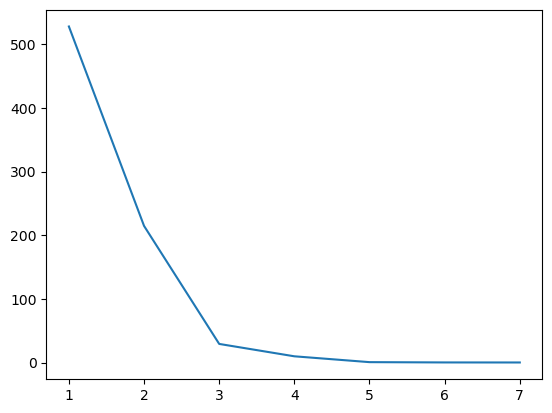

In [66]:
sns.lineplot(y=wcss1,x=range(1,8))

In [67]:
kmeans1=KMeans(n_clusters=3)
kmeans1.fit(x_train_df_2021_d)
df_2021_d_T["cluster1"]=kmeans1.labels_

In [68]:
df_2021_d_T

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH      ASSAM  \
2WIC                      0.0            0.0               0.0        0.0   
2WN                       0.0      81.585467             100.0    2.41172   
2WT                       0.0       0.020644               0.0        0.0   
3WN                       0.0       1.703138               0.0        0.0   
3WT                 32.608696       2.043765               0.0  97.537103   
4WIC                      0.0            0.0               0.0        0.0   
HGV                       0.0            0.0               0.0        0.0   
HMV                       0.0            0.0               0.0        0.0   
HPV                 43.478261            0.0               0.0        0.0   
LGV                       0.0       1.001239               0.0   0.006397   
LMV                 22.826087       4.118497               0.0    0.04478   
LPV                  1.086957            0.0               0.0        0.0   
MGV                       0.0            0.0               0.0        0.0   
MMV                       0.0            0.0               0.0        0.0   
MPV                       0.0            0.0               0.0        0.0   
OTH                       0.0        9.52725               0.0        0.0   

          BIHAR CHANDIGARH CHHATTISGARH      DELHI        GOA    GUJARAT  \
2WIC        0.0        0.0          0.0        0.0        0.0   0.010241   
2WN   12.082485  26.839237    62.419929  29.281426  77.372263  80.727087   
2WT         0.0        0.0          0.0        0.0        0.0        0.0   
3WN         0.0        0.0     0.094899        0.0        0.0   0.030722   
3WT   87.536282  52.588556    35.824437  62.940151   1.277372   7.680492   
4WIC        0.0        0.0          0.0        0.0        0.0   0.020481   
HGV         0.0        0.0          0.0        0.0        0.0        0.0   
HMV         0.0        0.0          0.0        0.0        0.0        0.0   
HPV    0.112637   5.449591          0.0   0.116212   3.193431   1.607783   
LGV    0.004332        0.0          0.0   0.073601   0.912409        0.0   
LMV    0.259932  15.122616     1.613286   5.934534  17.244526   8.499744   
LPV    0.004332        0.0      0.04745   1.650203        0.0   0.337942   
MGV         0.0        0.0          0.0        0.0        0.0        0.0   
MMV         0.0        0.0          0.0        0.0        0.0        0.0   
MPV         0.0        0.0          0.0   0.003874        0.0   0.614439   
OTH         0.0        0.0          0.0        0.0        0.0    0.47107   

        HARYANA HIMACHAL PRADESH JAMMU AND KASHMIR  JHARKHAND  KARNATAKA  \
2WIC        0.0              0.0               0.0        0.0   0.003003   
2WN   43.741339        93.251534         98.603839  44.693932  83.569541   
2WT    0.057737              0.0               0.0        0.0   5.371727   
3WN         0.0         0.306748               0.0        0.0   0.030026   
3WT   55.496536         3.067485           0.95986  53.969527   6.413644   
4WIC        0.0              0.0               0.0        0.0        0.0   
HGV         0.0              0.0               0.0        0.0        0.0   
HMV         0.0              0.0               0.0        0.0        0.0   
HPV         0.0              0.0               0.0        0.0   0.081071   
LGV    0.011547              0.0               0.0   0.053462   0.096085   
LMV    0.577367         3.374233            0.4363    0.96231   4.110617   
LPV    0.115473              0.0               0.0    0.32077   0.324285   
MGV         0.0              0.0               0.0        0.0        0.0   
MMV         0.0              0.0               0.0        0.0        0.0   
MPV         0.0              0.0               0.0        0.0        0.0   
OTH         0.0              0.0               0.0        0.0        0.0   

         KERALA LADAKH MADHYA PRADESH MAHARASHTRA   MANIPUR MEGHALAYA MIZORAM  \
2WIC    0.01145    0.0      

# we have get same cluster by using density for 2021 dataset.
Insight: We have segmented the dataset into three distinct clusters based on certain attributes.

    Cluster 2: This cluster represents the second most demanded type of vehicle in India during the year 2021. It exhibits characteristics that align with a significant but not the highest level of demand within the market. Example:- 3WT
    
    Cluster 1: This cluster signifies the most demanded vehicle in India. It reflects the highest level of demand among all vehicle types considered in the dataset, indicating its popularity and widespread appeal among consumers. Example :- 2WN
    
    Cluster 0: In contrast to the other clusters, Cluster 1 showcases a lack of interest from consumers in purchasing this particular product. It stands out as the least preferred option among the clusters, suggesting that it may face challenges in gaining traction or capturing market share compared to its counterparts.

# work on another dataset (2022)

In [69]:
# Here we deal with another dataset 2022,2023,2024

In [70]:
df_2022.head()

Unnamed: 0                Unnamed: 1  2WIC     2WN 2WT  3WN     3WT  4WIC  \
0           1  ANDAMAN & NICOBAR ISLAND     0       1  15    0       0     0   
1           2            ANDHRA PRADESH     2  27,592   1  441     133     0   
2           3         ARUNACHAL PRADESH     0       1   0    0       0     0   
3           4                     ASSAM     0   1,902   0    0  38,714     0   
4           5                     BIHAR     0   9,935   0    0  45,666     1   

   HGV  HMV  HPV  LGV  LMV LPV  MGV  MMV  MPV OTH Unnamed: 18  
0    0    0    0    0    4   3    0    0    0   0          23  
1   14    0   12  312  787   0    0    0    0  80      29,374  
2    0    0    0    0    1   0    0    0    0   0           2  
3    0    0    0    7   79   3    0    0    0   0      40,705  
4    0    0    1   13  135   0    0    0    0   0      55,751

In [71]:
df_2023.head()

Unnamed: 0                Unnamed: 1  2WIC     2WN 2WT  3WN     3WT  4WIC  \
0           1  ANDAMAN & NICOBAR ISLAND     0       7   5    0       0     0   
1           2            ANDHRA PRADESH     0  28,542   0  127   2,099     1   
2           3         ARUNACHAL PRADESH     0       3   0    0       0     0   
3           4                     ASSAM     0   2,455   0    0  57,900     0   
4           5                     BIHAR     0  12,404   0    0  75,193     1   

   HGV  HMV HPV  LGV    LMV LPV  MGV  MMV  MPV  OTH Unnamed: 18  
0    0    0   0    0     10   4    0    0    0    0          26  
1   32    0  90  292  1,618  24    0    0    1   12      32,838  
2    0    0   0    0     18   0    0    0    0    0          21  
3    0    0  60   16    221  48    0    0   98    0      60,798  
4    0    0   0   14    593  11    0    0    0    0      88,216

In [72]:
df_2024.head()

Unnamed: 0                Unnamed: 1  2WIC     2WN  2WT  3WN     3WT  4WIC  \
0           1  ANDAMAN & NICOBAR ISLAND     0       9    0    0       0     0   
1           2            ANDHRA PRADESH     0  13,095    1    1     992     0   
2           3         ARUNACHAL PRADESH     0       1    0    0       2     0   
3           4                     ASSAM     0   1,930    0    0  15,893     0   
4           5                     BIHAR     0   6,066    0    0  23,767     0   

   HGV  HMV  HPV  LGV  LMV LPV  MGV  MMV  MPV  OTH Unnamed: 18  
0    0    0    0    1    1   2    0    0    0    0          13  
1    0    0    0   23  863   5    0    0    0    0      14,980  
2    0    0    0    0   13   0    0    0    0    0          16  
3    0    0   40   23  132   6    0    0    2    0      18,026  
4    0    0    0   14  296   1    0    0    0    0      30,144

In [73]:
# rename the unappropriate columns names
df_2022.rename(columns={"Unnamed: 0":"S.No.","Unnamed: 1":"State","Unnamed: 18":"Total"},inplace=True)
df_2023.rename(columns={"Unnamed: 0":"S.No.","Unnamed: 1":"State","Unnamed: 18":"Total"},inplace=True)
df_2024.rename(columns={"Unnamed: 0":"S.No.","Unnamed: 1":"State","Unnamed: 18":"Total"},inplace=True)

In [74]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No.   33 non-null     int64 
 1   State   33 non-null     object
 2   2WIC    33 non-null     int64 
 3   2WN     33 non-null     object
 4   2WT     33 non-null     object
 5   3WN     33 non-null     int64 
 6   3WT     33 non-null     object
 7   4WIC    33 non-null     int64 
 8   HGV     33 non-null     int64 
 9   HMV     33 non-null     int64 
 10  HPV     33 non-null     int64 
 11  LGV     33 non-null     int64 
 12  LMV     33 non-null     object
 13  LPV     33 non-null     object
 14  MGV     33 non-null     int64 
 15  MMV     33 non-null     int64 
 16  MPV     33 non-null     int64 
 17  OTH     33 non-null     object
 18  Total   33 non-null     object
dtypes: int64(11), object(8)
memory usage: 5.0+ KB


In [75]:
l_2022=df_2022.columns[2:]

In [76]:
l_2022

Index(['2WIC', '2WN', '2WT', '3WN', '3WT', '4WIC', 'HGV', 'HMV', 'HPV', 'LGV',
       'LMV', 'LPV', 'MGV', 'MMV', 'MPV', 'OTH', 'Total'],
      dtype='object')

In [77]:
l_2022_select=[]
for i in l_2022:
    if df_2022[i].dtype=="int64":
        pass
    else:
        l_2022_select.append(i)

In [78]:
l_2022_select

['2WN', '2WT', '3WT', 'LMV', 'LPV', 'OTH', 'Total']

In [79]:
for i in l_2022_select:
    df_2022[i]=df_2022[i].str.replace(",","").astype("int")

In [80]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No.   33 non-null     int64 
 1   State   33 non-null     object
 2   2WIC    33 non-null     int64 
 3   2WN     33 non-null     int32 
 4   2WT     33 non-null     int32 
 5   3WN     33 non-null     int64 
 6   3WT     33 non-null     int32 
 7   4WIC    33 non-null     int64 
 8   HGV     33 non-null     int64 
 9   HMV     33 non-null     int64 
 10  HPV     33 non-null     int64 
 11  LGV     33 non-null     int64 
 12  LMV     33 non-null     int32 
 13  LPV     33 non-null     int32 
 14  MGV     33 non-null     int64 
 15  MMV     33 non-null     int64 
 16  MPV     33 non-null     int64 
 17  OTH     33 non-null     int32 
 18  Total   33 non-null     int32 
dtypes: int32(7), int64(11), object(1)
memory usage: 4.1+ KB


In [81]:
df_2022.drop(columns=["S.No."],inplace=True)

In [82]:
df_2022_d=df_2022.copy()

In [83]:
for i in l_2022[:-1]:
    df_2022_d[i]=(df_2022_d[i]*100)/df_2022_d["Total"]

In [84]:
df_2022_d_T=df_2022_d.T

In [85]:
df_2022_d_T.rename(columns=df_2022["State"],inplace=True)

In [86]:
df_2022_d_T.drop(index=["State","Total"],inplace=True)

In [87]:
df_2022_d_T

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH      ASSAM  \
2WIC                      0.0       0.006809               0.0        0.0   
2WN                  4.347826       93.93341              50.0   4.672645   
2WT                 65.217391       0.003404               0.0        0.0   
3WN                       0.0       1.501328               0.0        0.0   
3WT                       0.0       0.452781               0.0  95.108709   
4WIC                      0.0            0.0               0.0        0.0   
HGV                       0.0       0.047661               0.0        0.0   
HMV                       0.0            0.0               0.0        0.0   
HPV                       0.0       0.040852               0.0        0.0   
LGV                       0.0       1.062164               0.0   0.017197   
LMV                 17.391304        2.67924              50.0   0.194079   
LPV                 13.043478            0.0               0.0    0.00737   
MGV                       0.0            0.0               0.0        0.0   
MMV                       0.0            0.0               0.0        0.0   
MPV                       0.0            0.0               0.0        0.0   
OTH                       0.0        0.27235               0.0        0.0   

          BIHAR CHANDIGARH CHHATTISGARH      DELHI        GOA    GUJARAT  \
2WIC        0.0        0.0          0.0        0.0        0.0   0.002899   
2WN   17.820308  31.495774    73.310977   55.55038  87.796729  93.605241   
2WT         0.0   0.036751          0.0        0.0        0.0        0.0   
3WN         0.0        0.0     0.138609        0.0   0.017584   0.007247   
3WT   81.910638  56.964351    24.909457  34.728625   0.650607   1.972635   
4WIC   0.001794        0.0          0.0   0.001606        0.0   0.005798   
HGV         0.0        0.0          0.0        0.0        0.0        0.0   
HMV         0.0        0.0          0.0        0.0        0.0        0.0   
HPV    0.001794   1.212789          0.0   0.640892   0.298927    0.26524   
LGV    0.023318        0.0     0.004471   0.009637   0.263759   0.004348   
LMV    0.242148   9.922822     1.542589   5.029153  10.972393   4.072818   
LPV         0.0   0.110254     0.093897   4.039706        0.0   0.027539   
MGV         0.0        0.0          0.0        0.0        0.0        0.0   
MMV         0.0        0.0          0.0        0.0        0.0        0.0   
MPV         0.0   0.257258          0.0        0.0        0.0        0.0   
OTH         0.0        0.0          0.0        0.0        0.0   0.036235   

        HARYANA HIMACHAL PRADESH JAMMU AND KASHMIR  JHARKHAND  KARNATAKA  \
2WIC        0.0              0.0               0.0        0.0   0.004173   
2WN   45.259454        93.743793         45.458422  49.196024  86.533968   
2WT         0.0              0.0               0.0        0.0   4.137456   
3WN         0.0              0.0               0.0        0.0   0.002086   
3WT   51.504137         1.787488          53.47548  49.656483   4.413913   
4WIC        0.0              0.0               0.0        0.0   0.002086   
HGV         0.0              0.0               0.0        0.0        0.0   
HMV         0.0              0.0               0.0        0.0        0.0   
HPV         0.0              0.0               0.0        0.0   0.379736   
LGV      0.0348         0.099305               0.0        0.0   0.006259   
LMV    1.569871         4.369414          1.023454   0.760123   3.517777   
LPV    1.631738              0.0               0.0    0.38737   1.002545   
MGV         0.0              0.0               0.0        0.0        0.0   
MMV         0.0              0.0               0.0        0.0        0.0   
MPV         0.0              0.0          0.042644        0.0        0.0   
OTH         0.0              0.0               0.0        0.0        0.0   

         KERALA LADAKH MADHYA PRADESH MAHARASHTRA    MANIPUR  MEGHALAYA  \
2WIC   0.007572    0.0            

In [88]:
sr2=StandardScaler()

In [89]:
x_train_2022=sr2.fit_transform(df_2022_d_T)

In [90]:
wcss2=[]
for i in range(1,8):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(x_train_2022)
    wcss2.append(kmeans2.inertia_)

In [91]:
wcss2

[528.0,
 186.6650310120039,
 35.157419194065625,
 19.14534953056109,
 4.339675373146644,
 0.9565932276615747,
 0.2692369571853074]

<Axes: >

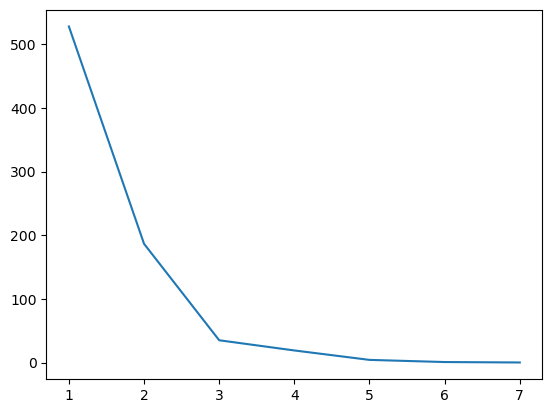

In [92]:
sns.lineplot(y=wcss2,x=range(1,8))

In [93]:
kmeans2=KMeans(n_clusters=3)
kmeans2.fit(x_train_2022)
df_2022_d_T["cluster2"]=kmeans2.labels_

In [94]:
df_2022_d_T

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH      ASSAM  \
2WIC                      0.0       0.006809               0.0        0.0   
2WN                  4.347826       93.93341              50.0   4.672645   
2WT                 65.217391       0.003404               0.0        0.0   
3WN                       0.0       1.501328               0.0        0.0   
3WT                       0.0       0.452781               0.0  95.108709   
4WIC                      0.0            0.0               0.0        0.0   
HGV                       0.0       0.047661               0.0        0.0   
HMV                       0.0            0.0               0.0        0.0   
HPV                       0.0       0.040852               0.0        0.0   
LGV                       0.0       1.062164               0.0   0.017197   
LMV                 17.391304        2.67924              50.0   0.194079   
LPV                 13.043478            0.0               0.0    0.00737   
MGV                       0.0            0.0               0.0        0.0   
MMV                       0.0            0.0               0.0        0.0   
MPV                       0.0            0.0               0.0        0.0   
OTH                       0.0        0.27235               0.0        0.0   

          BIHAR CHANDIGARH CHHATTISGARH      DELHI        GOA    GUJARAT  \
2WIC        0.0        0.0          0.0        0.0        0.0   0.002899   
2WN   17.820308  31.495774    73.310977   55.55038  87.796729  93.605241   
2WT         0.0   0.036751          0.0        0.0        0.0        0.0   
3WN         0.0        0.0     0.138609        0.0   0.017584   0.007247   
3WT   81.910638  56.964351    24.909457  34.728625   0.650607   1.972635   
4WIC   0.001794        0.0          0.0   0.001606        0.0   0.005798   
HGV         0.0        0.0          0.0        0.0        0.0        0.0   
HMV         0.0        0.0          0.0        0.0        0.0        0.0   
HPV    0.001794   1.212789          0.0   0.640892   0.298927    0.26524   
LGV    0.023318        0.0     0.004471   0.009637   0.263759   0.004348   
LMV    0.242148   9.922822     1.542589   5.029153  10.972393   4.072818   
LPV         0.0   0.110254     0.093897   4.039706        0.0   0.027539   
MGV         0.0        0.0          0.0        0.0        0.0        0.0   
MMV         0.0        0.0          0.0        0.0        0.0        0.0   
MPV         0.0   0.257258          0.0        0.0        0.0        0.0   
OTH         0.0        0.0          0.0        0.0        0.0   0.036235   

        HARYANA HIMACHAL PRADESH JAMMU AND KASHMIR  JHARKHAND  KARNATAKA  \
2WIC        0.0              0.0               0.0        0.0   0.004173   
2WN   45.259454        93.743793         45.458422  49.196024  86.533968   
2WT         0.0              0.0               0.0        0.0   4.137456   
3WN         0.0              0.0               0.0        0.0   0.002086   
3WT   51.504137         1.787488          53.47548  49.656483   4.413913   
4WIC        0.0              0.0               0.0        0.0   0.002086   
HGV         0.0              0.0               0.0        0.0        0.0   
HMV         0.0              0.0               0.0        0.0        0.0   
HPV         0.0              0.0               0.0        0.0   0.379736   
LGV      0.0348         0.099305               0.0        0.0   0.006259   
LMV    1.569871         4.369414          1.023454   0.760123   3.517777   
LPV    1.631738              0.0               0.0    0.38737   1.002545   
MGV         0.0              0.0               0.0        0.0        0.0   
MMV         0.0              0.0               0.0        0.0        0.0   
MPV         0.0              0.0          0.042644        0.0        0.0   
OTH         0.0              0.0               0.0        0.0        0.0   

         KERALA LADAKH MADHYA PRADESH MAHARASHTRA    MANIPUR  MEGHALAYA  \
2WIC   0.007572    0.0            

Insight:-<br>
    1st group indicate :- Two wheeler Non Transport<br>
    2nd group indicate :- three wheeler Transport

# work on 2023 dataset

In [95]:
df_2023.head()

S.No.                     State  2WIC     2WN 2WT  3WN     3WT  4WIC  HGV  \
0      1  ANDAMAN & NICOBAR ISLAND     0       7   5    0       0     0    0   
1      2            ANDHRA PRADESH     0  28,542   0  127   2,099     1   32   
2      3         ARUNACHAL PRADESH     0       3   0    0       0     0    0   
3      4                     ASSAM     0   2,455   0    0  57,900     0    0   
4      5                     BIHAR     0  12,404   0    0  75,193     1    0   

   HMV HPV  LGV    LMV LPV  MGV  MMV  MPV  OTH   Total  
0    0   0    0     10   4    0    0    0    0      26  
1    0  90  292  1,618  24    0    0    1   12  32,838  
2    0   0    0     18   0    0    0    0    0      21  
3    0  60   16    221  48    0    0   98    0  60,798  
4    0   0   14    593  11    0    0    0    0  88,216

In [96]:
df_2023.columns[2:]

Index(['2WIC', '2WN', '2WT', '3WN', '3WT', '4WIC', 'HGV', 'HMV', 'HPV', 'LGV',
       'LMV', 'LPV', 'MGV', 'MMV', 'MPV', 'OTH', 'Total'],
      dtype='object')

In [97]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No.   33 non-null     int64 
 1   State   33 non-null     object
 2   2WIC    33 non-null     int64 
 3   2WN     33 non-null     object
 4   2WT     33 non-null     object
 5   3WN     33 non-null     int64 
 6   3WT     33 non-null     object
 7   4WIC    33 non-null     int64 
 8   HGV     33 non-null     int64 
 9   HMV     33 non-null     int64 
 10  HPV     33 non-null     object
 11  LGV     33 non-null     int64 
 12  LMV     33 non-null     object
 13  LPV     33 non-null     object
 14  MGV     33 non-null     int64 
 15  MMV     33 non-null     int64 
 16  MPV     33 non-null     int64 
 17  OTH     33 non-null     int64 
 18  Total   33 non-null     object
dtypes: int64(11), object(8)
memory usage: 5.0+ KB


In [98]:
for i in df_2023.columns[2:]:
    if df_2023[i].dtype=="O":
        df_2023[i]=df_2023[i].str.replace(",","").astype(int)
    else:
        pass

In [99]:
df_2023.head()

S.No.                     State  2WIC    2WN  2WT  3WN    3WT  4WIC  HGV  \
0      1  ANDAMAN & NICOBAR ISLAND     0      7    5    0      0     0    0   
1      2            ANDHRA PRADESH     0  28542    0  127   2099     1   32   
2      3         ARUNACHAL PRADESH     0      3    0    0      0     0    0   
3      4                     ASSAM     0   2455    0    0  57900     0    0   
4      5                     BIHAR     0  12404    0    0  75193     1    0   

   HMV  HPV  LGV   LMV  LPV  MGV  MMV  MPV  OTH  Total  
0    0    0    0    10    4    0    0    0    0     26  
1    0   90  292  1618   24    0    0    1   12  32838  
2    0    0    0    18    0    0    0    0    0     21  
3    0   60   16   221   48    0    0   98    0  60798  
4    0    0   14   593   11    0    0    0    0  88216

for i in df_2023.columns[2:-1]:
    df_2023[i]=(df_2023[i]*100)/df_2023["Total"]

In [100]:
df_2023_T=df_2023.drop(columns=["Total","S.No."]).T

In [101]:
df_2023_T.rename(columns=df_2023["State"],inplace=True)

In [102]:
df_2023_T.drop(index="State",inplace=True)

In [103]:
df_2023_T

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                        0              0                 0      0      0   
2WN                         7          28542                 3   2455  12404   
2WT                         5              0                 0      0      0   
3WN                         0            127                 0      0      0   
3WT                         0           2099                 0  57900  75193   
4WIC                        0              1                 0      0      1   
HGV                         0             32                 0      0      0   
HMV                         0              0                 0      0      0   
HPV                         0             90                 0     60      0   
LGV                         0            292                 0     16     14   
LMV                        10           1618                18    221    593   
LPV                         4             24                 0     48     11   
MGV                         0              0                 0      0      0   
MMV                         0              0                 0      0      0   
MPV                         0              1                 0     98      0   
OTH                         0             12                 0      0      0   

     CHANDIGARH CHHATTISGARH  DELHI   GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC          0            0      0     0       7       0                0   
2WN        2151        25310  37578  8364   78502    7430              888   
2WT           1            0      0    40       0       5                0   
3WN           0            1      0     5       3       0                1   
3WT        3199        11356  26344    40    3037   20320               38   
4WIC          1            1      2     0      21       2                0   
HGV           0            0      0     0     264      17                0   
HMV           0            0      0     0       0       0                0   
HPV           0            0   1121    44     106       0               35   
LGV          26           23    322    22      99      57               10   
LMV        1022         1512   5829   965    6518    1880              153   
LPV           8           17   2453     0      59     777                3   
MGV           0            0      0     0       0       0                0   
MMV           0            0      0     0       0       0                0   
MPV           0            0      0     1       0       0                0   
OTH           0            0      0     0       1       0                0   

     JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                 0         0        21      4      0              0   
2WN               1835      7412    132919  61786     18          36792   
2WT                  0         0      1957      4      0              0   
3WN                  0         0        12      7      0             46   
3WT               7600     13229      5281   4068      1          29025   
4WIC                 0         0         3      6      0              0   
HGV                  0         0         3      0      0             10   
HMV                  0         0         0      0      0              0   
HPV                  0         0       280     70      9             18   
LGV                  0        17       216     54      0             52   
LMV                164       382      9319   9712      0           1689   
LPV                  0        84      2620     80      0             32   
MGV                  0         0         0      0      0              0   
MMV                  0         0         0      0      0              0   
MPV                150         2         0      0      0              0   
OTH                  0         0         0      0      0            263   

     MAHARASHTRA MANIPUR MEGHALAYA MIZORA

In [104]:
sr_23=StandardScaler()

In [105]:
x_train_df_2023_T=sr_23.fit_transform(df_2023_T)

In [106]:
wcss23=[]
for i in range(1,8):
    kmeans23=KMeans(n_clusters=i)
    kmeans23.fit(x_train_df_2023_T)
    wcss23.append(kmeans23.inertia_)

In [107]:
wcss23

[528.0,
 206.69001008312145,
 47.373135875056974,
 7.319003852431142,
 3.4926906579637738,
 0.15922399011395658,
 0.029755940425786175]

<Axes: >

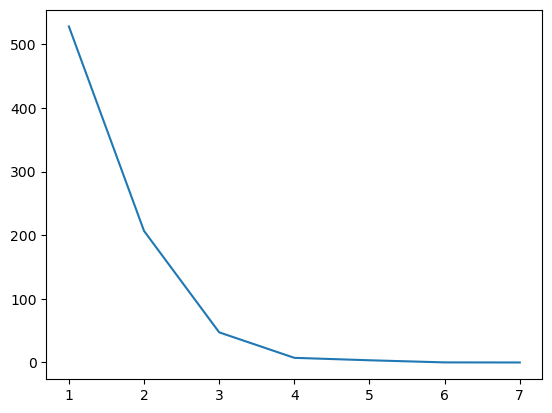

In [108]:
sns.lineplot(y=wcss23,x=range(1,8))

In [109]:
kmeans23=KMeans(n_clusters=4)
kmeans23.fit(x_train_df_2023_T)
df_2023_T["cluster_2023"]=kmeans23.labels_

In [110]:
df_2023_T

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                        0              0                 0      0      0   
2WN                         7          28542                 3   2455  12404   
2WT                         5              0                 0      0      0   
3WN                         0            127                 0      0      0   
3WT                         0           2099                 0  57900  75193   
4WIC                        0              1                 0      0      1   
HGV                         0             32                 0      0      0   
HMV                         0              0                 0      0      0   
HPV                         0             90                 0     60      0   
LGV                         0            292                 0     16     14   
LMV                        10           1618                18    221    593   
LPV                         4             24                 0     48     11   
MGV                         0              0                 0      0      0   
MMV                         0              0                 0      0      0   
MPV                         0              1                 0     98      0   
OTH                         0             12                 0      0      0   

     CHANDIGARH CHHATTISGARH  DELHI   GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC          0            0      0     0       7       0                0   
2WN        2151        25310  37578  8364   78502    7430              888   
2WT           1            0      0    40       0       5                0   
3WN           0            1      0     5       3       0                1   
3WT        3199        11356  26344    40    3037   20320               38   
4WIC          1            1      2     0      21       2                0   
HGV           0            0      0     0     264      17                0   
HMV           0            0      0     0       0       0                0   
HPV           0            0   1121    44     106       0               35   
LGV          26           23    322    22      99      57               10   
LMV        1022         1512   5829   965    6518    1880              153   
LPV           8           17   2453     0      59     777                3   
MGV           0            0      0     0       0       0                0   
MMV           0            0      0     0       0       0                0   
MPV           0            0      0     1       0       0                0   
OTH           0            0      0     0       1       0                0   

     JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                 0         0        21      4      0              0   
2WN               1835      7412    132919  61786     18          36792   
2WT                  0         0      1957      4      0              0   
3WN                  0         0        12      7      0             46   
3WT               7600     13229      5281   4068      1          29025   
4WIC                 0         0         3      6      0              0   
HGV                  0         0         3      0      0             10   
HMV                  0         0         0      0      0              0   
HPV                  0         0       280     70      9             18   
LGV                  0        17       216     54      0             52   
LMV                164       382      9319   9712      0           1689   
LPV                  0        84      2620     80      0             32   
MGV                  0         0         0      0      0              0   
MMV                  0         0         0      0      0              0   
MPV                150         2         0      0      0              0   
OTH                  0         0         0      0      0            263   

     MAHARASHTRA MANIPUR MEGHALAYA MIZORA

Insight: We have segmented the dataset into three distinct clusters based on certain attributes.

Cluster 2: This cluster represents the second most demanded type of vehicle in India during the year 2023. It exhibits characteristics that align with a significant but not the highest level of demand within the market.(3WN)[three wheeler Transport]

Cluster 1: This cluster signifies the most demanded vehicle in India. It reflects the highest level of demand among all vehicle types considered in the dataset, indicating its popularity and widespread appeal among consumers. (2WN) [Two wheeler non_Transport]

Cluster 0: In contrast to the other clusters, Cluster 1 showcases a lack of interest from consumers in purchasing this particular product. It stands out as the least preferred option among the clusters, suggesting that it may face challenges in gaining traction or capturing market share compared to its counterparts.

Cluster 3:  This cluster show the another sector of vehicles which is rapeatly increasing in demand.

In [111]:
# here we have to some analysis like rate of increase in demand of product in year by year.

# Here we deal with 2024 dataset

In [112]:
df_2024

S.No.                     State  2WIC     2WN  2WT  3WN     3WT  4WIC  \
0       1  ANDAMAN & NICOBAR ISLAND     0       9    0    0       0     0   
1       2            ANDHRA PRADESH     0  13,095    1    1     992     0   
2       3         ARUNACHAL PRADESH     0       1    0    0       2     0   
3       4                     ASSAM     0   1,930    0    0  15,893     0   
4       5                     BIHAR     0   6,066    0    0  23,767     0   
5       6                CHANDIGARH     0     523    0    0     912     0   
6       7              CHHATTISGARH     0   9,284    0    0   4,031     0   
7       8                     DELHI     0  12,286    0    0  11,386     0   
8       9                       GOA     0   3,939   30    1       1     0   
9      10                   GUJARAT     0  21,003    0    0   1,190     3   
10     11                   HARYANA     0   4,088    0    0   6,390     0   
11     12          HIMACHAL PRADESH     0     272    0    0      64     0   
12     13         JAMMU AND KASHMIR     0     916    0    0   2,787     0   
13     14                 JHARKHAND     0   2,359    0    0   3,997     0   
14     15                 KARNATAKA     2  52,188  337    3   2,039     5   
15     16                    KERALA     0  22,125    0    5   1,969     1   
16     17                    LADAKH     0      14    0    0       0     0   
17     18            MADHYA PRADESH     0  16,051    0   10   9,221     0   
18     19               MAHARASHTRA     0  66,190    0   19   4,142     2   
19     20                   MANIPUR     0      23    0    0      58     0   
20     21                 MEGHALAYA     0      43    0    0     228     0   
21     22                   MIZORAM     0     154    0    0       0     0   
22     23                  NAGALAND     0       1    0    0       0     0   
23     24                    ODISHA     0  16,427   90    0   1,684     0   
24     25                PUDUCHERRY     0   1,296    0    2      72     0   
25     26                    PUNJAB     0   3,894    0   20   8,280     0   
26     27                 RAJASTHAN     0  21,554    1    0   8,516     3   
27     28                    SIKKIM     0       0    0    0       0     0   
28     29                TAMIL NADU     0  32,913    0   22   1,607     3   
29     30                   TRIPURA     0      71    0    0   2,442     0   
30     31          UT OF DNH AND DD     0     100    0    0       3     0   
31     32               UTTARAKHAND     0   1,721    0    0   2,737     0   
32     33             UTTAR PRADESH     0  23,032    0    0  70,526     0   
33     34               WEST BENGAL     0   5,200  200    0   3,805     0   

    HGV  HMV  HPV  LGV    LMV    LPV  MGV  MMV  MPV  OTH   Total  
0     0    0    0    1      1      2    0    0    0    0      13  
1     0    0    0   23    863      5    0    0    0    0  14,980  
2     0    0    0    0     13      0    0    0    0    0      16  
3     0    0   40   23    132      6    0    0    2    0  18,026  
4     0    0    0   14    296      1    0    0    0    0  30,144  
5     0    0    0   36    406      2    0    0    0    0   1,879  
6     0    0    0   14    454      3    0    0    0    0  13,786  
7     0    0  224  203  2,201  1,414    0    0    0    0  27,714  
8     0    0    9    8    396     16    0    0    5    0   4,405  
9     0    0  194  104  2,203     12    0    0    0    0  24,709  
10    0    0   20   37    904    354    0    0    0    0  11,793  
11    0    0    0    9     66      0    0    0    0    0     411  
12    0    0   27    2     84      0    0    0    0    0   3,816  
13    0    0    0   26    127     30    0    0    0    0   6,539  
14    0    0  438  165  3,619  1,206    0    0    0    0  60,002  
15   16    0   35   66  3,310     29    0    0    0    0  27,556  
16    0    0    0    0      0      0    0    0    0    0      14  
17    0    0   44   90    638     18    0    0    0    0  26,072  
18    0    0  302  604  4,688    43

In [113]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No.   34 non-null     int64 
 1   State   34 non-null     object
 2   2WIC    34 non-null     int64 
 3   2WN     34 non-null     object
 4   2WT     34 non-null     int64 
 5   3WN     34 non-null     int64 
 6   3WT     34 non-null     object
 7   4WIC    34 non-null     int64 
 8   HGV     34 non-null     int64 
 9   HMV     34 non-null     int64 
 10  HPV     34 non-null     int64 
 11  LGV     34 non-null     int64 
 12  LMV     34 non-null     object
 13  LPV     34 non-null     object
 14  MGV     34 non-null     int64 
 15  MMV     34 non-null     int64 
 16  MPV     34 non-null     int64 
 17  OTH     34 non-null     int64 
 18  Total   34 non-null     object
dtypes: int64(13), object(6)
memory usage: 5.2+ KB


In [114]:
for i in df_2024.columns[2:]:
    if df_2024[i].dtype=="O":
        df_2024[i]=df_2024[i].str.replace(",","").astype(int)
    else:
        pass

In [115]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No.   34 non-null     int64 
 1   State   34 non-null     object
 2   2WIC    34 non-null     int64 
 3   2WN     34 non-null     int32 
 4   2WT     34 non-null     int64 
 5   3WN     34 non-null     int64 
 6   3WT     34 non-null     int32 
 7   4WIC    34 non-null     int64 
 8   HGV     34 non-null     int64 
 9   HMV     34 non-null     int64 
 10  HPV     34 non-null     int64 
 11  LGV     34 non-null     int64 
 12  LMV     34 non-null     int32 
 13  LPV     34 non-null     int32 
 14  MGV     34 non-null     int64 
 15  MMV     34 non-null     int64 
 16  MPV     34 non-null     int64 
 17  OTH     34 non-null     int64 
 18  Total   34 non-null     int32 
dtypes: int32(5), int64(13), object(1)
memory usage: 4.5+ KB


In [116]:
df_2024.head()

S.No.                     State  2WIC    2WN  2WT  3WN    3WT  4WIC  HGV  \
0      1  ANDAMAN & NICOBAR ISLAND     0      9    0    0      0     0    0   
1      2            ANDHRA PRADESH     0  13095    1    1    992     0    0   
2      3         ARUNACHAL PRADESH     0      1    0    0      2     0    0   
3      4                     ASSAM     0   1930    0    0  15893     0    0   
4      5                     BIHAR     0   6066    0    0  23767     0    0   

   HMV  HPV  LGV  LMV  LPV  MGV  MMV  MPV  OTH  Total  
0    0    0    1    1    2    0    0    0    0     13  
1    0    0   23  863    5    0    0    0    0  14980  
2    0    0    0   13    0    0    0    0    0     16  
3    0   40   23  132    6    0    0    2    0  18026  
4    0    0   14  296    1    0    0    0    0  30144

In [117]:
df_2024_d=df_2024.copy()

In [118]:
for i in df_2024_d.columns[2:-1]:
    df_2024_d[i]=(df_2024_d[i]*100)/df_2024_d["Total"]

In [119]:
df_2024_d

S.No.                     State      2WIC         2WN       2WT       3WN  \
0       1  ANDAMAN & NICOBAR ISLAND  0.000000   69.230769  0.000000  0.000000   
1       2            ANDHRA PRADESH  0.000000   87.416555  0.006676  0.006676   
2       3         ARUNACHAL PRADESH  0.000000    6.250000  0.000000  0.000000   
3       4                     ASSAM  0.000000   10.706757  0.000000  0.000000   
4       5                     BIHAR  0.000000   20.123408  0.000000  0.000000   
5       6                CHANDIGARH  0.000000   27.833954  0.000000  0.000000   
6       7              CHHATTISGARH  0.000000   67.343682  0.000000  0.000000   
7       8                     DELHI  0.000000   44.331385  0.000000  0.000000   
8       9                       GOA  0.000000   89.421112  0.681044  0.022701   
9      10                   GUJARAT  0.000000   85.001416  0.000000  0.000000   
10     11                   HARYANA  0.000000   34.664632  0.000000  0.000000   
11     12          HIMACHAL PRADESH  0.000000   66.180049  0.000000  0.000000   
12     13         JAMMU AND KASHMIR  0.000000   24.004193  0.000000  0.000000   
13     14                 JHARKHAND  0.000000   36.075853  0.000000  0.000000   
14     15                 KARNATAKA  0.003333   86.977101  0.561648  0.005000   
15     16                    KERALA  0.000000   80.291044  0.000000  0.018145   
16     17                    LADAKH  0.000000  100.000000  0.000000  0.000000   
17     18            MADHYA PRADESH  0.000000   61.564130  0.000000  0.038355   
18     19               MAHARASHTRA  0.000000   86.655408  0.000000  0.024875   
19     20                   MANIPUR  0.000000   23.000000  0.000000  0.000000   
20     21                 MEGHALAYA  0.000000    9.368192  0.000000  0.000000   
21     22                   MIZORAM  0.000000   99.354839  0.000000  0.000000   
22     23                  NAGALAND  0.000000   20.000000  0.000000  0.000000   
23     24                    ODISHA  0.000000   85.951235  0.470908  0.000000   
24     25                PUDUCHERRY  0.000000   91.011236  0.000000  0.140449   
25     26                    PUNJAB  0.000000   30.305860  0.000000  0.155654   
26     27                 RAJASTHAN  0.000000   67.077459  0.003112  0.000000   
27     28                    SIKKIM  0.000000    0.000000  0.000000  0.000000   
28     29                TAMIL NADU  0.000000   87.474087  0.000000  0.058470   
29     30                   TRIPURA  0.000000    2.806324  0.000000  0.000000   
30     31          UT OF DNH AND DD  0.000000   74.074074  0.000000  0.000000   
31     32               UTTARAKHAND  0.000000   37.082525  0.000000  0.000000   
32     33             UTTAR PRADESH  0.000000   24.022947  0.000000  0.000000   
33     34               WEST BENGAL  0.000000   50.067398  1.925669  0.000000   

          3WT      4WIC       HGV  HMV       HPV        LGV         LMV  \
0    0.000000  0.000000  0.000000  0.0  0.000000   7.692308    7.692308   
1    6.622163  0.000000  0.000000  0.0  0.000000   0.153538    5.761015   
2   12.500000  0.000000  0.000000  0.0  0.000000   0.000000   81.250000   
3   88.167092  0.000000  0.000000  0.0  0.221902   0.127593    0.732276   
4   78.844878  0.000000  0.000000  0.0  0.000000   0.046444    0.981953   
5   48.536456  0.000000  0.000000  0.0  0.000000   1.915913   21.607238   
6   29.239809  0.000000  0.000000  0.0  0.000000   0.101552    3.293196   
7   41.083929  0.000000  0.000000  0.0  0.808256   0.732482    7.941834   
8    0.022701  0.000000  0.000000  0.0  0.204313   0.181612    8.989784   
9    4.816059  0.012141  0.000000  0.0  0.785139   0.420899    8.915780   
10  54.184686  0.000000  0.000000  0.0  0.169592   0.313745    7.665564   
11  15.571776  0.000000  0.000000  0.0  0.000000   2.189781   16.058394   
12  73.034591  0.000000  0.000000  0.0  0.707547   0.052411    2.201258   
13  61.125554  0.000000  0.000000  0.0  0.000000   0.397614    1.942193   
14   3.398220  0.008333  0.000000  0.0  0.7

In [120]:
df_2024_d_T=df_2024_d.drop(columns=["S.No.","Total"]).T

In [121]:
df_2024_d_T.rename(columns=df_2024_d.State,inplace=True)

In [122]:
df_2024_d_T.drop(index=["State"],inplace=True)

In [123]:
df_2024_d_T

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH      ASSAM  \
2WIC                      0.0            0.0               0.0        0.0   
2WN                 69.230769      87.416555              6.25  10.706757   
2WT                       0.0       0.006676               0.0        0.0   
3WN                       0.0       0.006676               0.0        0.0   
3WT                       0.0       6.622163              12.5  88.167092   
4WIC                      0.0            0.0               0.0        0.0   
HGV                       0.0            0.0               0.0        0.0   
HMV                       0.0            0.0               0.0        0.0   
HPV                       0.0            0.0               0.0   0.221902   
LGV                  7.692308       0.153538               0.0   0.127593   
LMV                  7.692308       5.761015             81.25   0.732276   
LPV                 15.384615       0.033378               0.0   0.033285   
MGV                       0.0            0.0               0.0        0.0   
MMV                       0.0            0.0               0.0        0.0   
MPV                       0.0            0.0               0.0   0.011095   
OTH                       0.0            0.0               0.0        0.0   

          BIHAR CHANDIGARH CHHATTISGARH      DELHI        GOA    GUJARAT  \
2WIC        0.0        0.0          0.0        0.0        0.0        0.0   
2WN   20.123408  27.833954    67.343682  44.331385  89.421112  85.001416   
2WT         0.0        0.0          0.0        0.0   0.681044        0.0   
3WN         0.0        0.0          0.0        0.0   0.022701        0.0   
3WT   78.844878  48.536456    29.239809  41.083929   0.022701   4.816059   
4WIC        0.0        0.0          0.0        0.0        0.0   0.012141   
HGV         0.0        0.0          0.0        0.0        0.0        0.0   
HMV         0.0        0.0          0.0        0.0        0.0        0.0   
HPV         0.0        0.0          0.0   0.808256   0.204313   0.785139   
LGV    0.046444   1.915913     0.101552   0.732482   0.181612   0.420899   
LMV    0.981953  21.607238     3.293196   7.941834   8.989784    8.91578   
LPV    0.003317    0.10644     0.021761   5.102114   0.363224   0.048565   
MGV         0.0        0.0          0.0        0.0        0.0        0.0   
MMV         0.0        0.0          0.0        0.0        0.0        0.0   
MPV         0.0        0.0          0.0        0.0   0.113507        0.0   
OTH         0.0        0.0          0.0        0.0        0.0        0.0   

        HARYANA HIMACHAL PRADESH JAMMU AND KASHMIR  JHARKHAND  KARNATAKA  \
2WIC        0.0              0.0               0.0        0.0   0.003333   
2WN   34.664632        66.180049         24.004193  36.075853  86.977101   
2WT         0.0              0.0               0.0        0.0   0.561648   
3WN         0.0              0.0               0.0        0.0      0.005   
3WT   54.184686        15.571776         73.034591  61.125554    3.39822   
4WIC        0.0              0.0               0.0        0.0   0.008333   
HGV         0.0              0.0               0.0        0.0        0.0   
HMV         0.0              0.0               0.0        0.0        0.0   
HPV    0.169592              0.0          0.707547        0.0   0.729976   
LGV    0.313745         2.189781          0.052411   0.397614   0.274991   
LMV    7.665564        16.058394          2.201258   1.942193   6.031466   
LPV    3.001781              0.0               0.0   0.458786   2.009933   
MGV         0.0              0.0               0.0        0.0        0.0   
MMV         0.0              0.0               0.0        0.0        0.0   
MPV         0.0              0.0               0.0        0.0        0.0   
OTH         0.0              0.0               0.0        0.0        0.0   

         KERALA LADAKH MADHYA PRADESH MAHARASHTRA MANIPUR  MEGHALAYA  \
2WIC        0.0    0.0            0.0

In [124]:
sc_2024=StandardScaler()

In [125]:
x_train_2024=sc_2024.fit_transform(df_2024_d_T)

In [126]:
wcss_2024=[]
for i in range(1,8):
    kmeans_2024=KMeans(n_clusters=i)
    kmeans_2024.fit(x_train_2024)
    wcss_2024.append(kmeans_2024.inertia_)


In [127]:
wcss_2024

[543.9999999999999,
 216.48136666917736,
 62.90104662298792,
 7.616947263847977,
 1.020354638429839,
 0.026003440124782617,
 0.00806409233228333]

<Axes: >

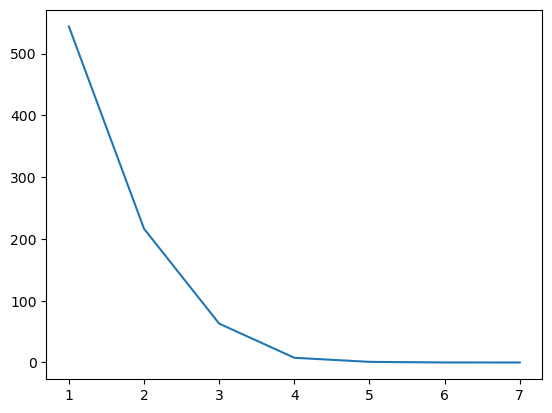

In [128]:
sns.lineplot(y=wcss_2024,x=range(1,8))

In [129]:
kmeans_2024=KMeans(n_clusters=4)
kmeans_2024.fit(x_train_2024)
df_2024_d_T["Cluster_2024"]=kmeans_2024.labels_

In [130]:
df_2024_d_T[["ANDHRA PRADESH","Cluster_2024"]]

ANDHRA PRADESH  Cluster_2024
2WIC            0.0             0
2WN       87.416555             1
2WT        0.006676             0
3WN        0.006676             0
3WT        6.622163             2
4WIC            0.0             0
HGV             0.0             0
HMV             0.0             0
HPV             0.0             0
LGV        0.153538             0
LMV        5.761015             3
LPV        0.033378             0
MGV             0.0             0
MMV             0.0             0
MPV             0.0             0
OTH             0.0             0

1. cluster 3 :- we have 2WN(two wheeler non transport)
2. cluster 2 :- 3WT (three wheeler transport)
3. cluster 0 :- LMV (Light Motor vehicle)
4. Cluster 1 :- All the rest Vehicle.

# Here we try to know he rate of percentage of sales increase.

1. Analysics of 2021

In [131]:
df_2021_T

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                         0              0                 0      0      0   
2WN                          0           7904                 2    377   2789   
2WT                          0              2                 0      0      0   
3WN                          0            165                 0      0      0   
3WT                         30            198                 0  15247  20206   
4WIC                         0              0                 0      0      0   
HGV                          0              0                 0      0      0   
HMV                          0              0                 0      0      0   
HPV                         40              0                 0      0     26   
LGV                          0             97                 0      1      1   
LMV                         21            399                 0      7     60   
LPV                          1              0                 0      0      1   
MGV                          0              0                 0      0      0   
MMV                          0              0                 0      0      0   
MPV                          0              0                 0      0      0   
OTH                          0            923                 0      0      0   
Total                       92           9688                 2  15632  23083   

      CHANDIGARH CHHATTISGARH  DELHI   GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC           0            0      0     0       1       0                0   
2WN          197         2631   7559   848    7883    3788              304   
2WT            0            0      0     0       0       5                0   
3WN            0            4      0     0       3       0                1   
3WT          386         1510  16248    14     750    4806               10   
4WIC           0            0      0     0       2       0                0   
HGV            0            0      0     0       0       0                0   
HMV            0            0      0     0       0       0                0   
HPV           40            0     30    35     157       0                0   
LGV            0            0     19    10       0       1                0   
LMV          111           68   1532   189     830      50               11   
LPV            0            2    426     0      33      10                0   
MGV            0            0      0     0       0       0                0   
MMV            0            0      0     0       0       0                0   
MPV            0            0      1     0      60       0                0   
OTH            0            0      0     0      46       0                0   
Total        734         4215  25815  1096    9765    8660              326   

      JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                  0         0         1      1      0              0   
2WN                1130      1672     27832   5850      6           5102   
2WT                   0         0      1789     30      0              0   
3WN                   0         0        10     18      0              0   
3WT                  11      2019      2136   1178      0           4326   
4WIC                  0         0         0      1      0              0   
HGV                   0         0         0      0      0              0   
HMV                   0         0         0      0      0              0   
HPV                   0         0        27      0      0              0   
LGV                   0         2        32      0      0              0   
LMV                   5        36      1369   1648      0            182   
LPV                   0        12       108      8      0             10   
MGV                   0         0         0      0      0              0   
MMV                   0         0         0      0      0   

In [132]:
df_2021_T.iloc[1,].sum()

154500

In [133]:
ind=df_2021_T.index
ind

Index(['2WIC', '2WN', '2WT', '3WN', '3WT', '4WIC', 'HGV', 'HMV', 'HPV', 'LGV',
       'LMV', 'LPV', 'MGV', 'MMV', 'MPV', 'OTH', 'Total'],
      dtype='object')

In [134]:
df_2021_T.loc['2WN'].sum()

154500

In [135]:
sum_vehicle_2021=[]
for i in ind:
    sum_vehicle_2021.append(df_2021_T.loc[i].sum())

In [136]:
df_2021_T_A=df_2021_T.copy()

In [137]:
df_2021_T_A["sum_vehicle_2021"]=sum_vehicle_2021

In [138]:
df_2021_T_A

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                         0              0                 0      0      0   
2WN                          0           7904                 2    377   2789   
2WT                          0              2                 0      0      0   
3WN                          0            165                 0      0      0   
3WT                         30            198                 0  15247  20206   
4WIC                         0              0                 0      0      0   
HGV                          0              0                 0      0      0   
HMV                          0              0                 0      0      0   
HPV                         40              0                 0      0     26   
LGV                          0             97                 0      1      1   
LMV                         21            399                 0      7     60   
LPV                          1              0                 0      0      1   
MGV                          0              0                 0      0      0   
MMV                          0              0                 0      0      0   
MPV                          0              0                 0      0      0   
OTH                          0            923                 0      0      0   
Total                       92           9688                 2  15632  23083   

      CHANDIGARH CHHATTISGARH  DELHI   GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC           0            0      0     0       1       0                0   
2WN          197         2631   7559   848    7883    3788              304   
2WT            0            0      0     0       0       5                0   
3WN            0            4      0     0       3       0                1   
3WT          386         1510  16248    14     750    4806               10   
4WIC           0            0      0     0       2       0                0   
HGV            0            0      0     0       0       0                0   
HMV            0            0      0     0       0       0                0   
HPV           40            0     30    35     157       0                0   
LGV            0            0     19    10       0       1                0   
LMV          111           68   1532   189     830      50               11   
LPV            0            2    426     0      33      10                0   
MGV            0            0      0     0       0       0                0   
MMV            0            0      0     0       0       0                0   
MPV            0            0      1     0      60       0                0   
OTH            0            0      0     0      46       0                0   
Total        734         4215  25815  1096    9765    8660              326   

      JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                  0         0         1      1      0              0   
2WN                1130      1672     27832   5850      6           5102   
2WT                   0         0      1789     30      0              0   
3WN                   0         0        10     18      0              0   
3WT                  11      2019      2136   1178      0           4326   
4WIC                  0         0         0      1      0              0   
HGV                   0         0         0      0      0              0   
HMV                   0         0         0      0      0              0   
HPV                   0         0        27      0      0              0   
LGV                   0         2        32      0      0              0   
LMV                   5        36      1369   1648      0            182   
LPV                   0        12       108      8      0             10   
MGV                   0         0         0      0      0              0   
MMV                   0         0         0      0      0   

In [139]:
df_2021_T_A["sum_vehicle_2021"]

2WIC          6
2WN      154500
2WT        1834
3WN         207
3WT      157954
4WIC          3
HGV           0
HMV           0
HPV         921
LGV        1084
LMV       12299
LPV         736
MGV           0
MMV           0
MPV         254
OTH        1787
Total    331585
Name: sum_vehicle_2021, dtype: int64

2. Analysis of 2022

In [140]:
df_2022_T_A=df_2022.T

In [141]:
df_2022_T_A.rename(columns=df_2022.State,inplace=True)

In [142]:
df_2022_T_A.drop(index="State",inplace=True)

In [143]:
sum_vehicle_2022=[]
for i in df_2022_T_A.index:
    sum_vehicle_2022.append(df_2022_T_A.loc[i].sum())

In [144]:
df_2022_T_A["sum_vehicle_2022"]=sum_vehicle_2022

In [145]:
sum_vehicle_2022

[12,
 627325,
 4072,
 548,
 349700,
 12,
 14,
 0,
 1948,
 638,
 33253,
 4994,
 0,
 0,
 25,
 2488,
 1025029]

# Analysic of 2023 data

In [146]:
df_2023_T_A=df_2023_T.copy()

In [147]:
df_2023_T_A.head()

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                        0              0                 0      0      0   
2WN                         7          28542                 3   2455  12404   
2WT                         5              0                 0      0      0   
3WN                         0            127                 0      0      0   
3WT                         0           2099                 0  57900  75193   

     CHANDIGARH CHHATTISGARH  DELHI   GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC          0            0      0     0       7       0                0   
2WN        2151        25310  37578  8364   78502    7430              888   
2WT           1            0      0    40       0       5                0   
3WN           0            1      0     5       3       0                1   
3WT        3199        11356  26344    40    3037   20320               38   

     JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                 0         0        21      4      0              0   
2WN               1835      7412    132919  61786     18          36792   
2WT                  0         0      1957      4      0              0   
3WN                  0         0        12      7      0             46   
3WT               7600     13229      5281   4068      1          29025   

     MAHARASHTRA MANIPUR MEGHALAYA MIZORAM NAGALAND ODISHA PUDUCHERRY PUNJAB  \
2WIC           2       0         0       0        0      0          0      0   
2WN       168041      89        73     166        3  38319       2451   8754   
2WT            0       0         0       0        0     30          0      0   
3WN            3       0         1       0        0      1          2      0   
3WT        11599     280        18       0        0   4768         90  16108   

     RAJASTHAN TAMIL NADU TRIPURA UT OF DNH AND DD UTTARAKHAND UTTAR PRADESH  \
2WIC        23          0       0                0           0             0   
2WN      59449      78421     256              100        5689         40469   
2WT         19          0       0                0           0            15   
3WN          0         41       0                1           0             0   
3WT      29680       5388    6025               16       10616        232609   

     WEST BENGAL  cluster_2023  
2WIC           0             1  
2WN        11407             0  
2WT            0             1  
3WN            0             1  
3WT         7272             2

In [148]:
df_2023_T_A.drop(columns=["cluster_2023"])

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                        0              0                 0      0      0   
2WN                         7          28542                 3   2455  12404   
2WT                         5              0                 0      0      0   
3WN                         0            127                 0      0      0   
3WT                         0           2099                 0  57900  75193   
4WIC                        0              1                 0      0      1   
HGV                         0             32                 0      0      0   
HMV                         0              0                 0      0      0   
HPV                         0             90                 0     60      0   
LGV                         0            292                 0     16     14   
LMV                        10           1618                18    221    593   
LPV                         4             24                 0     48     11   
MGV                         0              0                 0      0      0   
MMV                         0              0                 0      0      0   
MPV                         0              1                 0     98      0   
OTH                         0             12                 0      0      0   

     CHANDIGARH CHHATTISGARH  DELHI   GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC          0            0      0     0       7       0                0   
2WN        2151        25310  37578  8364   78502    7430              888   
2WT           1            0      0    40       0       5                0   
3WN           0            1      0     5       3       0                1   
3WT        3199        11356  26344    40    3037   20320               38   
4WIC          1            1      2     0      21       2                0   
HGV           0            0      0     0     264      17                0   
HMV           0            0      0     0       0       0                0   
HPV           0            0   1121    44     106       0               35   
LGV          26           23    322    22      99      57               10   
LMV        1022         1512   5829   965    6518    1880              153   
LPV           8           17   2453     0      59     777                3   
MGV           0            0      0     0       0       0                0   
MMV           0            0      0     0       0       0                0   
MPV           0            0      0     1       0       0                0   
OTH           0            0      0     0       1       0                0   

     JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                 0         0        21      4      0              0   
2WN               1835      7412    132919  61786     18          36792   
2WT                  0         0      1957      4      0              0   
3WN                  0         0        12      7      0             46   
3WT               7600     13229      5281   4068      1          29025   
4WIC                 0         0         3      6      0              0   
HGV                  0         0         3      0      0             10   
HMV                  0         0         0      0      0              0   
HPV                  0         0       280     70      9             18   
LGV                  0        17       216     54      0             52   
LMV                164       382      9319   9712      0           1689   
LPV                  0        84      2620     80      0             32   
MGV                  0         0         0      0      0              0   
MMV                  0         0         0      0      0              0   
MPV                150         2         0      0      0              0   
OTH                  0         0         0      0      0            263   

     MAHARASHTRA MANIPUR MEGHALAYA MIZORA

In [149]:
sum_vehicle_2023=[]
for i in df_2023_T_A.index:
    sum_vehicle_2023.append(df_2023_T_A.loc[i].sum())

In [150]:
sum_vehicle_2023

[58,
 858083,
 2077,
 252,
 583201,
 45,
 340,
 4,
 2389,
 2552,
 73238,
 9274,
 1,
 7,
 290,
 277]

In [151]:
df_2023_T_A["sum_vehicle_2023"]=sum_vehicle_2023

In [152]:
df_2023_T_A

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                        0              0                 0      0      0   
2WN                         7          28542                 3   2455  12404   
2WT                         5              0                 0      0      0   
3WN                         0            127                 0      0      0   
3WT                         0           2099                 0  57900  75193   
4WIC                        0              1                 0      0      1   
HGV                         0             32                 0      0      0   
HMV                         0              0                 0      0      0   
HPV                         0             90                 0     60      0   
LGV                         0            292                 0     16     14   
LMV                        10           1618                18    221    593   
LPV                         4             24                 0     48     11   
MGV                         0              0                 0      0      0   
MMV                         0              0                 0      0      0   
MPV                         0              1                 0     98      0   
OTH                         0             12                 0      0      0   

     CHANDIGARH CHHATTISGARH  DELHI   GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC          0            0      0     0       7       0                0   
2WN        2151        25310  37578  8364   78502    7430              888   
2WT           1            0      0    40       0       5                0   
3WN           0            1      0     5       3       0                1   
3WT        3199        11356  26344    40    3037   20320               38   
4WIC          1            1      2     0      21       2                0   
HGV           0            0      0     0     264      17                0   
HMV           0            0      0     0       0       0                0   
HPV           0            0   1121    44     106       0               35   
LGV          26           23    322    22      99      57               10   
LMV        1022         1512   5829   965    6518    1880              153   
LPV           8           17   2453     0      59     777                3   
MGV           0            0      0     0       0       0                0   
MMV           0            0      0     0       0       0                0   
MPV           0            0      0     1       0       0                0   
OTH           0            0      0     0       1       0                0   

     JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                 0         0        21      4      0              0   
2WN               1835      7412    132919  61786     18          36792   
2WT                  0         0      1957      4      0              0   
3WN                  0         0        12      7      0             46   
3WT               7600     13229      5281   4068      1          29025   
4WIC                 0         0         3      6      0              0   
HGV                  0         0         3      0      0             10   
HMV                  0         0         0      0      0              0   
HPV                  0         0       280     70      9             18   
LGV                  0        17       216     54      0             52   
LMV                164       382      9319   9712      0           1689   
LPV                  0        84      2620     80      0             32   
MGV                  0         0         0      0      0              0   
MMV                  0         0         0      0      0              0   
MPV                150         2         0      0      0              0   
OTH                  0         0         0      0      0            263   

     MAHARASHTRA MANIPUR MEGHALAYA MIZORA

# Analysic of 2024

In [153]:
df_2024_T=df_2024.copy().T

In [154]:
df_2024_T.rename(columns=df_2024["State"],inplace=True)

In [155]:
df_2024_T.drop(index=["S.No.","State"],inplace=True)

In [156]:
df_2024_T_A=df_2024_T.copy()

In [157]:
sum_vehicle_2024=[]
for i in df_2024_T_A.index:
    sum_vehicle_2024.append(df_2024_T_A.loc[i].sum())

In [158]:
df_2024_T_A["sum_vehicle_2024"]=sum_vehicle_2024

In [159]:
df_2024_T_A

ANDAMAN & NICOBAR ISLAND ANDHRA PRADESH ARUNACHAL PRADESH  ASSAM  BIHAR  \
2WIC                         0              0                 0      0      0   
2WN                          9          13095                 1   1930   6066   
2WT                          0              1                 0      0      0   
3WN                          0              1                 0      0      0   
3WT                          0            992                 2  15893  23767   
4WIC                         0              0                 0      0      0   
HGV                          0              0                 0      0      0   
HMV                          0              0                 0      0      0   
HPV                          0              0                 0     40      0   
LGV                          1             23                 0     23     14   
LMV                          1            863                13    132    296   
LPV                          2              5                 0      6      1   
MGV                          0              0                 0      0      0   
MMV                          0              0                 0      0      0   
MPV                          0              0                 0      2      0   
OTH                          0              0                 0      0      0   
Total                       13          14980                16  18026  30144   

      CHANDIGARH CHHATTISGARH  DELHI   GOA GUJARAT HARYANA HIMACHAL PRADESH  \
2WIC           0            0      0     0       0       0                0   
2WN          523         9284  12286  3939   21003    4088              272   
2WT            0            0      0    30       0       0                0   
3WN            0            0      0     1       0       0                0   
3WT          912         4031  11386     1    1190    6390               64   
4WIC           0            0      0     0       3       0                0   
HGV            0            0      0     0       0       0                0   
HMV            0            0      0     0       0       0                0   
HPV            0            0    224     9     194      20                0   
LGV           36           14    203     8     104      37                9   
LMV          406          454   2201   396    2203     904               66   
LPV            2            3   1414    16      12     354                0   
MGV            0            0      0     0       0       0                0   
MMV            0            0      0     0       0       0                0   
MPV            0            0      0     5       0       0                0   
OTH            0            0      0     0       0       0                0   
Total       1879        13786  27714  4405   24709   11793              411   

      JAMMU AND KASHMIR JHARKHAND KARNATAKA KERALA LADAKH MADHYA PRADESH  \
2WIC                  0         0         2      0      0              0   
2WN                 916      2359     52188  22125     14          16051   
2WT                   0         0       337      0      0              0   
3WN                   0         0         3      5      0             10   
3WT                2787      3997      2039   1969      0           9221   
4WIC                  0         0         5      1      0              0   
HGV                   0         0         0     16      0              0   
HMV                   0         0         0      0      0              0   
HPV                  27         0       438     35      0             44   
LGV                   2        26       165     66      0             90   
LMV                  84       127      3619   3310      0            638   
LPV                   0        30      1206     29      0             18   
MGV                   0         0         0      0      0              0   
MMV                   0         0         0      0      0   

# Now we apply clustering algorithm together for 2021,2022,2023,2024 dataset for better result.

# Combine Analysis

In [160]:
# creating empty dataframe where we store percentage increase in sale of vehicles.
df_combine_percentage = pd.DataFrame(index=df_2023_T_A.index)

In [161]:
# we add 1 to data1 to not get infinite number.
def percentage_increase(data1,data2):
    return (data2-data1)*100/(data1+1)

In [162]:
percentage_increase(df_2021_T_A["sum_vehicle_2021"],df_2022_T_A["sum_vehicle_2022"])

2WIC       85.714286
2WN       306.033618
2WT       121.961853
3WN       163.942308
3WT       121.392802
4WIC      225.000000
HGV      1400.000000
HMV         0.000000
HPV       111.388286
LGV       -41.105991
LMV       170.357724
LPV       577.747626
MGV         0.000000
MMV         0.000000
MPV       -89.803922
OTH        39.205817
Total     209.129457
dtype: float64

In [163]:
df_combine_percentage["2021"]=df_2021_T_A["sum_vehicle_2021"]

In [164]:
df_combine_percentage["2021-2022"]=percentage_increase(df_2021_T_A["sum_vehicle_2021"],df_2022_T_A["sum_vehicle_2022"])

In [165]:
df_combine_percentage["2022"]=df_2022_T_A["sum_vehicle_2022"]

In [166]:
df_combine_percentage["2022-2023"]=percentage_increase(df_2022_T_A["sum_vehicle_2022"],df_2023_T_A["sum_vehicle_2023"])

In [167]:
df_combine_percentage["2023"]=df_2023_T_A["sum_vehicle_2023"]

In [168]:
# we have only 4 month data of 2024 so we multiple it with 4 to provide it equality with other data.
df_combine_percentage["2023-2024"]=percentage_increase(df_2023_T_A["sum_vehicle_2023"],df_2024_T_A["sum_vehicle_2024"]*4)

In [169]:
df_combine_percentage["2024"]=df_2024_T_A["sum_vehicle_2024"]*4

In [170]:
df_combine_percentage["Total_vehicle"]=df_2021_T_A["sum_vehicle_2021"]+df_2022_T_A["sum_vehicle_2022"]+df_2023_T_A["sum_vehicle_2023"]+df_2024_T_A["sum_vehicle_2024"]

In [171]:
df_combine_percentage["total_percentage_increase"]=percentage_increase(df_2021_T_A["sum_vehicle_2021"],df_2024_T_A["sum_vehicle_2024"])

In [172]:
df_combine_percentage

2021    2021-2022    2022    2022-2023    2023   2023-2024     2024  \
2WIC       6    85.714286      12   353.846154      58  -84.745763        8   
2WN   154500   306.033618  627325    36.784383  858083   57.918456  1355072   
2WT     1834   121.961853    4072   -48.981095    2077   26.900866     2636   
3WN      207   163.942308     548   -53.916211     252   31.620553      332   
3WT   157954   121.392802  349700    66.771613  583201   29.451717   754964   
4WIC       3   225.000000      12   253.846154      45   50.000000       68   
HGV        0  1400.000000      14  2173.333333     340    9.384164      372   
HMV        0     0.000000       0   400.000000       4  -80.000000        0   
HPV      921   111.388286    1948    22.626988    2389  148.075314     5928   
LGV     1084   -41.105991     638   299.530516    2552  323.697611    10816   
LMV    12299   170.357724   33253   120.241174   73238   57.578612   115408   
LPV      736   577.747626    4994    85.685686    9274   84.247978    17088   
MGV        0     0.000000       0   100.000000       1  -50.000000        0   
MMV        0     0.000000       0   700.000000       7  -87.500000        0   
MPV      254   -89.803922      25  1019.230769     290  -77.663230       64   
OTH     1787    39.205817    2488   -88.830856     277  -99.640288        0   

      Total_vehicle  total_percentage_increase  
2WIC           78.0                 -57.142857  
2WN       1978676.0                 119.266542  
2WT          8642.0                 -64.032698  
3WN          1090.0                 -59.615385  
3WT       1279596.0                  19.490994  
4WIC           77.0                 350.000000  
HGV           447.0                9300.000000  
HMV             4.0                   0.000000  
HPV          6740.0                  60.845987  
LGV          6978.0                 149.308756  
LMV        147642.0                 134.577236  
LPV         19276.0                 479.782904  
MGV             1.0                   0.000000  
MMV             7.0                   0.000000  
MPV           585.0                 -93.333333  
OTH          4552.0                 -99.944072

In [270]:
index_o=df_combine_percentage.index

In [277]:
# checking data distribution:
data1=df_combine_percentage[["2021","2022","2023","2024"]].T


In [278]:
data1

2WIC      2WN   2WT  3WN     3WT  4WIC  HGV  HMV   HPV    LGV     LMV  \
2021     6   154500  1834  207  157954     3    0    0   921   1084   12299   
2022    12   627325  4072  548  349700    12   14    0  1948    638   33253   
2023    58   858083  2077  252  583201    45  340    4  2389   2552   73238   
2024     8  1355072  2636  332  754964    68  372    0  5928  10816  115408   

        LPV  MGV  MMV  MPV   OTH  
2021    736    0    0  254  1787  
2022   4994    0    0   25  2488  
2023   9274    1    7  290   277  
2024  17088    0    0   64     0

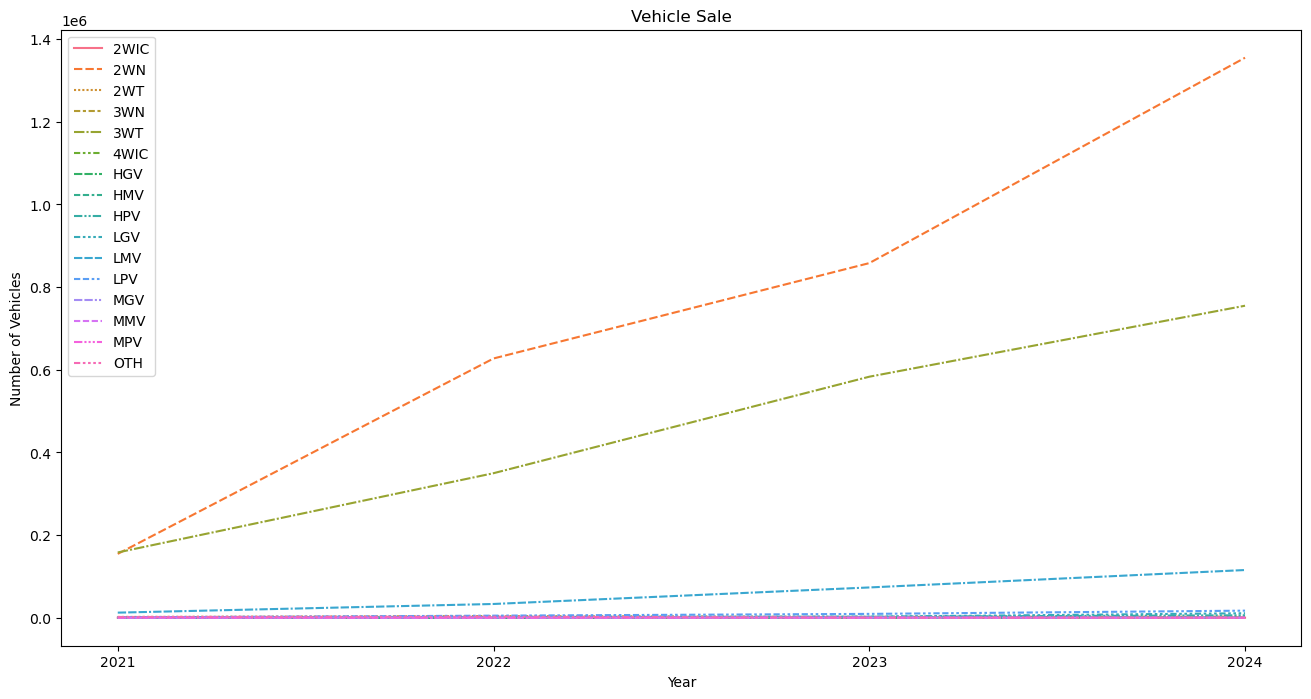

In [280]:
plt.figure(figsize=(16,8))
sns.lineplot(data1)
plt.title("Vehicle Sale")
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.show()

<font color="red">Insight :-</font> Visualization show 2WN (Two wheeler Non Transport) and 3WT (Three Wheeler Transport) is dominating the Electric Vehicle market

In [284]:
data2=df_combine_percentage[["2021-2022","2022-2023","2023-2024"]].T

In [285]:
data2

2WIC         2WN         2WT         3WN         3WT  \
2021-2022   85.714286  306.033618  121.961853  163.942308  121.392802   
2022-2023  353.846154   36.784383  -48.981095  -53.916211   66.771613   
2023-2024  -84.745763   57.918456   26.900866   31.620553   29.451717   

                 4WIC          HGV    HMV         HPV         LGV         LMV  \
2021-2022  225.000000  1400.000000    0.0  111.388286  -41.105991  170.357724   
2022-2023  253.846154  2173.333333  400.0   22.626988  299.530516  120.241174   
2023-2024   50.000000     9.384164  -80.0  148.075314  323.697611   57.578612   

                  LPV    MGV    MMV          MPV        OTH  
2021-2022  577.747626    0.0    0.0   -89.803922  39.205817  
2022-2023   85.685686  100.0  700.0  1019.230769 -88.830856  
2023-2024   84.247978  -50.0  -87.5   -77.663230 -99.640288

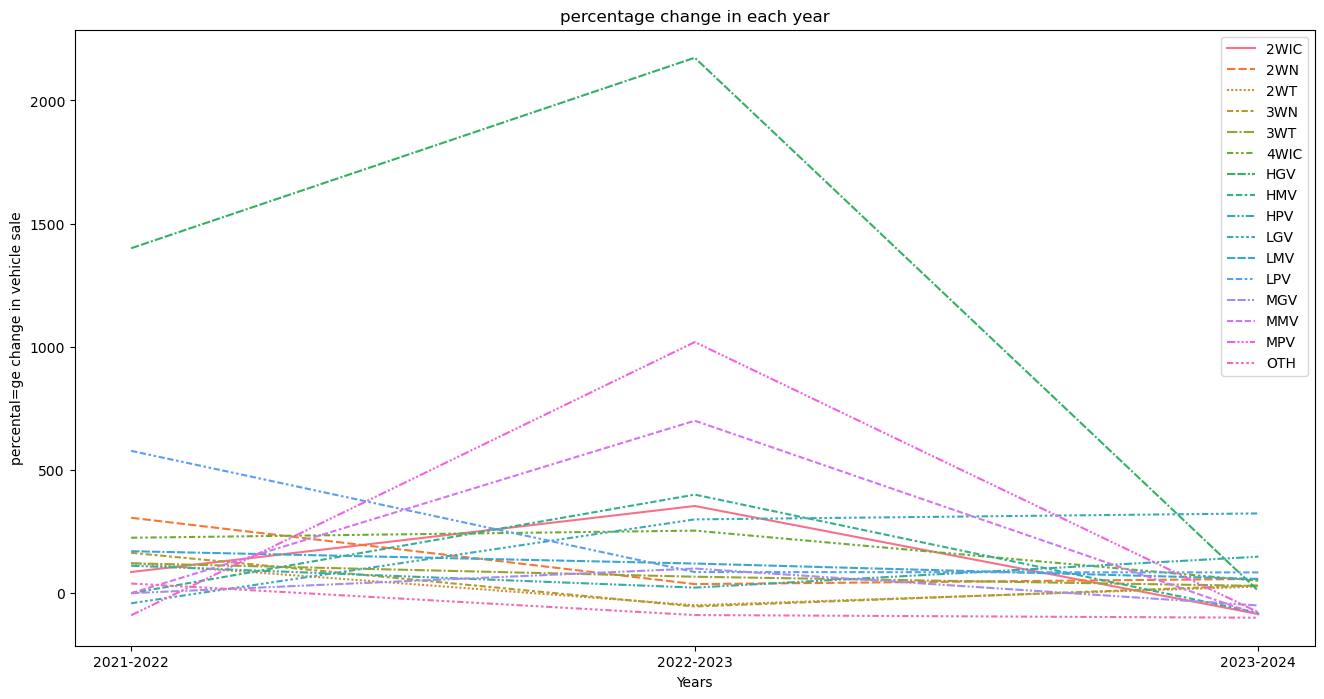

In [299]:
plt.figure(figsize=(16,8))
sns.lineplot(data=data2)
plt.title("percentage change in each year")
plt.xlabel("Years")
plt.ylabel("percental=ge change in vehicle sale")
plt.show()

<font color="red"> Insight :- </font> This visualization show us HGV ( Heavy Good Vehicle ) percentage increase in sale is very high compare with rest types of vehicle.

In [334]:
df_2021["Total"]+ df_2022["Total"]+df_2023["Total"]+df_2024["Total"]

0        154.0
1      86880.0
2         41.0
3     135161.0
4     197194.0
5      11742.0
6      78586.0
7     189435.0
8      20669.0
9     192085.0
10     76803.0
11      2872.0
12     19401.0
13     45088.0
14    341793.0
15    151699.0
16        88.0
17    141246.0
18    436720.0
19       954.0
20       619.0
21       358.0
22        16.0
23     97731.0
24      5948.0
25     57285.0
26    227610.0
27    187323.0
28     50550.0
29      2861.0
30     37815.0
31    512392.0
32    134868.0
33         NaN
Name: Total, dtype: float64

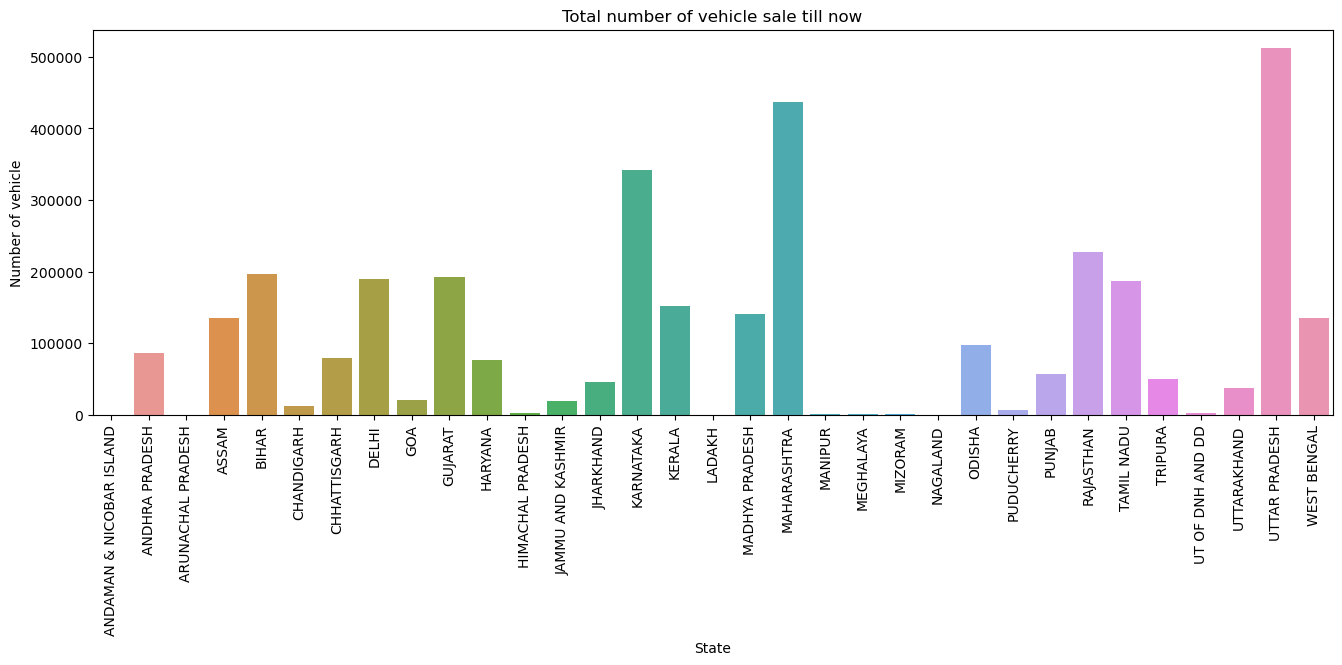

In [341]:
plt.figure(figsize=(16,5))
sns.barplot(x=df_2021["State"],y=df_2021["Total"]+ df_2022["Total"]+df_2023["Total"]+df_2024["Total"])
plt.xticks(rotation=90)
plt.title("Total number of vehicle sale till now")
plt.ylabel("Number of vehicle")
plt.show()

<font color="red"> Insight :- </font> This visualisation shows the maximum customer of Electric vehicle is of Uttar Pradesh, Maharashtra and Karnataka.

# Clustering dataset:-

# Try1 :-

In [173]:
sr_try=StandardScaler()
x_train_try_1=sr_try.fit_transform(df_combine_percentage)

In [174]:
wcss_try_1=[]
for i in range(1,8):
    kmeans_try=KMeans(n_clusters=i)
    kmeans_try.fit(x_train_try_1)
    wcss_try_1.append(kmeans_try.inertia_)

In [175]:
wcss_try_1

[144.0,
 67.64675514140663,
 27.558182857791238,
 15.796057031379778,
 10.01715226508793,
 5.6396554904785,
 3.6256353493142113]

<Axes: >

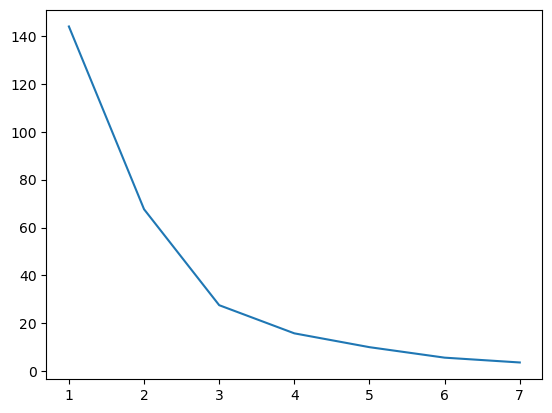

In [176]:
sns.lineplot(y=wcss_try_1,x=range(1,8))

In [177]:
kmeans_try_1=KMeans(n_clusters=3)
kmeans_try_1.fit(x_train_try_1)
df_combine_percentage["cluster_1"]=kmeans_try_1.labels_

In [178]:
df_combine_percentage

2021    2021-2022    2022    2022-2023    2023   2023-2024     2024  \
2WIC       6    85.714286      12   353.846154      58  -84.745763        8   
2WN   154500   306.033618  627325    36.784383  858083   57.918456  1355072   
2WT     1834   121.961853    4072   -48.981095    2077   26.900866     2636   
3WN      207   163.942308     548   -53.916211     252   31.620553      332   
3WT   157954   121.392802  349700    66.771613  583201   29.451717   754964   
4WIC       3   225.000000      12   253.846154      45   50.000000       68   
HGV        0  1400.000000      14  2173.333333     340    9.384164      372   
HMV        0     0.000000       0   400.000000       4  -80.000000        0   
HPV      921   111.388286    1948    22.626988    2389  148.075314     5928   
LGV     1084   -41.105991     638   299.530516    2552  323.697611    10816   
LMV    12299   170.357724   33253   120.241174   73238   57.578612   115408   
LPV      736   577.747626    4994    85.685686    9274   84.247978    17088   
MGV        0     0.000000       0   100.000000       1  -50.000000        0   
MMV        0     0.000000       0   700.000000       7  -87.500000        0   
MPV      254   -89.803922      25  1019.230769     290  -77.663230       64   
OTH     1787    39.205817    2488   -88.830856     277  -99.640288        0   

      Total_vehicle  total_percentage_increase  cluster_1  
2WIC           78.0                 -57.142857          0  
2WN       1978676.0                 119.266542          1  
2WT          8642.0                 -64.032698          0  
3WN          1090.0                 -59.615385          0  
3WT       1279596.0                  19.490994          1  
4WIC           77.0                 350.000000          0  
HGV           447.0                9300.000000          2  
HMV             4.0                   0.000000          0  
HPV          6740.0                  60.845987          0  
LGV          6978.0                 149.308756          0  
LMV        147642.0                 134.577236          0  
LPV         19276.0                 479.782904          0  
MGV             1.0                   0.000000          0  
MMV             7.0                   0.000000          0  
MPV           585.0                 -93.333333          0  
OTH          4552.0                 -99.944072          0

In [343]:
df_combine_percentage[["cluster_1"]]

cluster_1
2WIC          0
2WN           1
2WT           0
3WN           0
3WT           1
4WIC          0
HGV           2
HMV           0
HPV           0
LGV           0
LMV           0
LPV           0
MGV           0
MMV           0
MPV           0
OTH           0

# Now we are going to try DBScan clustering algorithm.

In [180]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN( eps=0.5,min_samples=2)
dbs.fit(x_train_try_1)
dbs.labels_

array([ 0, -1,  1,  1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [181]:
# Note:- It shows negative labels means this algorithm not work good on this dataset.

# Now we try AgglomerativeClustering 

In [182]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as shc

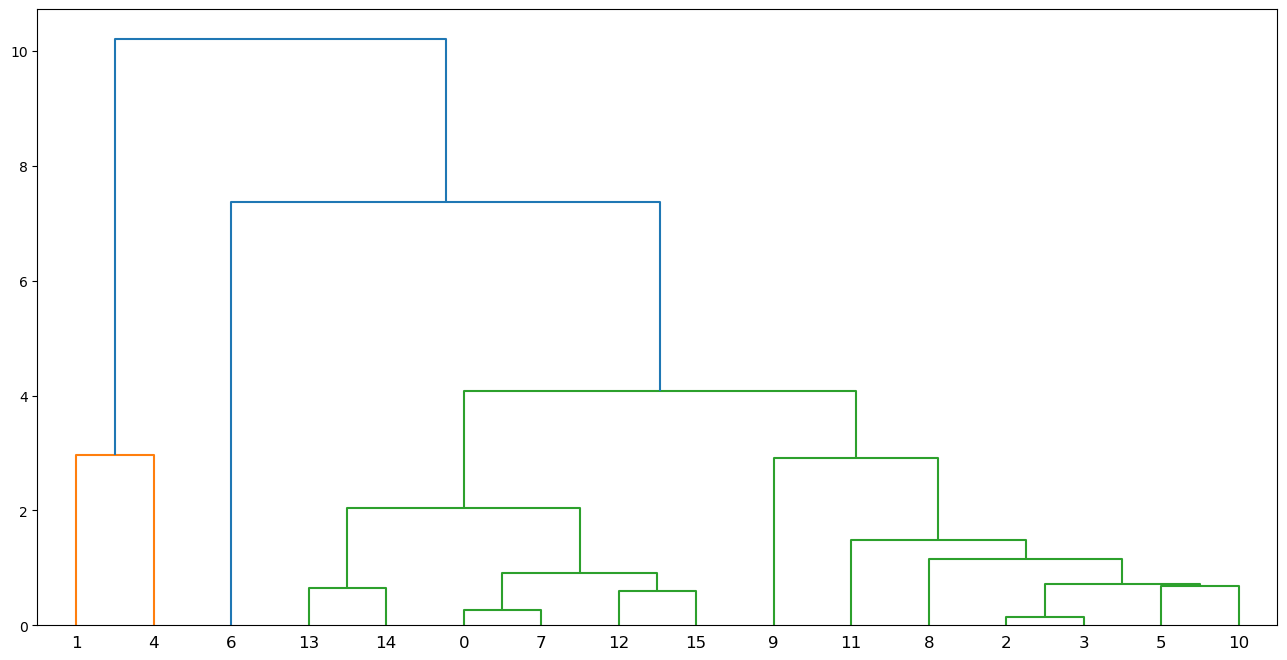

In [183]:
plt.figure(figsize=(16,8))
shc.dendrogram(shc.linkage(x_train_try_1,method="complete"))
plt.show()

In [184]:
alg=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="average")

In [185]:
df_combine_percentage["cluster_by_AgglomerativeClustering"]=alg.fit_predict(x_train_try_1)

In [186]:
df_combine_percentage

2021    2021-2022    2022    2022-2023    2023   2023-2024     2024  \
2WIC       6    85.714286      12   353.846154      58  -84.745763        8   
2WN   154500   306.033618  627325    36.784383  858083   57.918456  1355072   
2WT     1834   121.961853    4072   -48.981095    2077   26.900866     2636   
3WN      207   163.942308     548   -53.916211     252   31.620553      332   
3WT   157954   121.392802  349700    66.771613  583201   29.451717   754964   
4WIC       3   225.000000      12   253.846154      45   50.000000       68   
HGV        0  1400.000000      14  2173.333333     340    9.384164      372   
HMV        0     0.000000       0   400.000000       4  -80.000000        0   
HPV      921   111.388286    1948    22.626988    2389  148.075314     5928   
LGV     1084   -41.105991     638   299.530516    2552  323.697611    10816   
LMV    12299   170.357724   33253   120.241174   73238   57.578612   115408   
LPV      736   577.747626    4994    85.685686    9274   84.247978    17088   
MGV        0     0.000000       0   100.000000       1  -50.000000        0   
MMV        0     0.000000       0   700.000000       7  -87.500000        0   
MPV      254   -89.803922      25  1019.230769     290  -77.663230       64   
OTH     1787    39.205817    2488   -88.830856     277  -99.640288        0   

      Total_vehicle  total_percentage_increase  cluster_1  \
2WIC           78.0                 -57.142857          0   
2WN       1978676.0                 119.266542          1   
2WT          8642.0                 -64.032698          0   
3WN          1090.0                 -59.615385          0   
3WT       1279596.0                  19.490994          1   
4WIC           77.0                 350.000000          0   
HGV           447.0                9300.000000          2   
HMV             4.0                   0.000000          0   
HPV          6740.0                  60.845987          0   
LGV          6978.0                 149.308756          0   
LMV        147642.0                 134.577236          0   
LPV         19276.0                 479.782904          0   
MGV             1.0                   0.000000          0   
MMV             7.0                   0.000000          0   
MPV           585.0                 -93.333333          0   
OTH          4552.0                 -99.944072          0   

      cluster_by_AgglomerativeClustering  
2WIC                                   0  
2WN                                    1  
2WT                                    0  
3WN                                    0  
3WT                                    1  
4WIC                                   0  
HGV                                    2  
HMV                                    0  
HPV                                    0  
LGV                                    0  
LMV                                    0  
LPV                                    0  
MGV                                    0  
MMV                                    0  
MPV                                    0  
OTH                                    0

In [187]:
df_combine_percentage.drop(columns=["cluster_by_AgglomerativeClustering"],inplace=True)

# AlAgglomerativeClustering also gives same cluster so we prefer KMeans clustering.

# Try 2 :- 

In [189]:
sr_try_2=StandardScaler()
x_train_try_2=sr_try_2.fit_transform(df_combine_percentage.iloc[:,:7])

In [190]:
wcss_try_2=[]
for i in range(1,8):
    kmeans_try_2=KMeans(n_clusters=i)
    kmeans_try_2.fit(x_train_try_2)
    wcss_try_2.append(kmeans_try_2.inertia_)

In [191]:
wcss_try_2

[111.99999999999999,
 50.92027731497536,
 26.608176227856188,
 14.877147612648358,
 9.099824708436131,
 5.532934483349742,
 3.5189321444509236]

<Axes: >

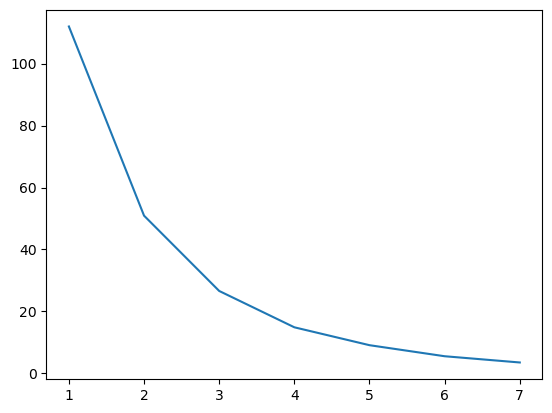

In [192]:
sns.lineplot(y=wcss_try_2,x=range(1,8))

In [193]:
kmeans_try_2=KMeans(n_clusters=3)
kmeans_try_2.fit(x_train_try_2)
df_combine_percentage["cluster_2"]=kmeans_try_2.labels_

In [194]:
df_combine_percentage

2021    2021-2022    2022    2022-2023    2023   2023-2024     2024  \
2WIC       6    85.714286      12   353.846154      58  -84.745763        8   
2WN   154500   306.033618  627325    36.784383  858083   57.918456  1355072   
2WT     1834   121.961853    4072   -48.981095    2077   26.900866     2636   
3WN      207   163.942308     548   -53.916211     252   31.620553      332   
3WT   157954   121.392802  349700    66.771613  583201   29.451717   754964   
4WIC       3   225.000000      12   253.846154      45   50.000000       68   
HGV        0  1400.000000      14  2173.333333     340    9.384164      372   
HMV        0     0.000000       0   400.000000       4  -80.000000        0   
HPV      921   111.388286    1948    22.626988    2389  148.075314     5928   
LGV     1084   -41.105991     638   299.530516    2552  323.697611    10816   
LMV    12299   170.357724   33253   120.241174   73238   57.578612   115408   
LPV      736   577.747626    4994    85.685686    9274   84.247978    17088   
MGV        0     0.000000       0   100.000000       1  -50.000000        0   
MMV        0     0.000000       0   700.000000       7  -87.500000        0   
MPV      254   -89.803922      25  1019.230769     290  -77.663230       64   
OTH     1787    39.205817    2488   -88.830856     277  -99.640288        0   

      Total_vehicle  total_percentage_increase  cluster_1  cluster_2  
2WIC           78.0                 -57.142857          0          1  
2WN       1978676.0                 119.266542          1          0  
2WT          8642.0                 -64.032698          0          1  
3WN          1090.0                 -59.615385          0          1  
3WT       1279596.0                  19.490994          1          0  
4WIC           77.0                 350.000000          0          1  
HGV           447.0                9300.000000          2          2  
HMV             4.0                   0.000000          0          1  
HPV          6740.0                  60.845987          0          1  
LGV          6978.0                 149.308756          0          1  
LMV        147642.0                 134.577236          0          1  
LPV         19276.0                 479.782904          0          1  
MGV             1.0                   0.000000          0          1  
MMV             7.0                   0.000000          0          1  
MPV           585.0                 -93.333333          0          1  
OTH          4552.0                 -99.944072          0          1

# Try 3 :-

In [195]:
sr_try_3=StandardScaler()
x_train_try_3=sr_try_3.fit_transform(df_combine_percentage[["2021","2022","2023","2024"]])

In [196]:
wcss_try_3=[]
for i in range(1,8):
    kmeans_try_3=KMeans(n_clusters=i)
    kmeans_try_3.fit(x_train_try_3)
    wcss_try_3.append(kmeans_try_3.inertia_)

In [197]:
wcss_try_3

[63.99999999999999,
 3.6487690890690727,
 0.26194505818012365,
 0.007377334445010707,
 0.0030826122830855504,
 0.0010646913282292242,
 0.0002689031315562386]

<Axes: >

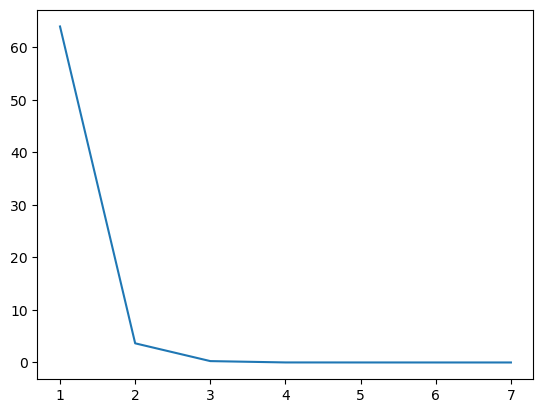

In [198]:
sns.lineplot(y=wcss_try_3,x=range(1,8))

In [199]:
kmeans_try_3=KMeans(n_clusters=2)
kmeans_try_3.fit(x_train_try_3)
df_combine_percentage["cluster_3"]=kmeans_try_3.labels_

In [200]:
df_combine_percentage

2021    2021-2022    2022    2022-2023    2023   2023-2024     2024  \
2WIC       6    85.714286      12   353.846154      58  -84.745763        8   
2WN   154500   306.033618  627325    36.784383  858083   57.918456  1355072   
2WT     1834   121.961853    4072   -48.981095    2077   26.900866     2636   
3WN      207   163.942308     548   -53.916211     252   31.620553      332   
3WT   157954   121.392802  349700    66.771613  583201   29.451717   754964   
4WIC       3   225.000000      12   253.846154      45   50.000000       68   
HGV        0  1400.000000      14  2173.333333     340    9.384164      372   
HMV        0     0.000000       0   400.000000       4  -80.000000        0   
HPV      921   111.388286    1948    22.626988    2389  148.075314     5928   
LGV     1084   -41.105991     638   299.530516    2552  323.697611    10816   
LMV    12299   170.357724   33253   120.241174   73238   57.578612   115408   
LPV      736   577.747626    4994    85.685686    9274   84.247978    17088   
MGV        0     0.000000       0   100.000000       1  -50.000000        0   
MMV        0     0.000000       0   700.000000       7  -87.500000        0   
MPV      254   -89.803922      25  1019.230769     290  -77.663230       64   
OTH     1787    39.205817    2488   -88.830856     277  -99.640288        0   

      Total_vehicle  total_percentage_increase  cluster_1  cluster_2  \
2WIC           78.0                 -57.142857          0          1   
2WN       1978676.0                 119.266542          1          0   
2WT          8642.0                 -64.032698          0          1   
3WN          1090.0                 -59.615385          0          1   
3WT       1279596.0                  19.490994          1          0   
4WIC           77.0                 350.000000          0          1   
HGV           447.0                9300.000000          2          2   
HMV             4.0                   0.000000          0          1   
HPV          6740.0                  60.845987          0          1   
LGV          6978.0                 149.308756          0          1   
LMV        147642.0                 134.577236          0          1   
LPV         19276.0                 479.782904          0          1   
MGV             1.0                   0.000000          0          1   
MMV             7.0                   0.000000          0          1   
MPV           585.0                 -93.333333          0          1   
OTH          4552.0                 -99.944072          0          1   

      cluster_3  
2WIC          0  
2WN           1  
2WT           0  
3WN           0  
3WT           1  
4WIC          0  
HGV           0  
HMV           0  
HPV           0  
LGV           0  
LMV           0  
LPV           0  
MGV           0  
MMV           0  
MPV           0  
OTH           0

# Try :- 4

In [201]:
sr_try_4=StandardScaler()
x_train_try_4=sr_try_4.fit_transform(df_combine_percentage[["2021-2022","2022-2023","2023-2024"]])

In [202]:
wcss_try_4=[]
for i in range(1,8):
    kmeans_try_4=KMeans(n_clusters=i)
    kmeans_try_4.fit(x_train_try_4)
    wcss_try_4.append(kmeans_try_4.inertia_)

In [203]:
wcss_try_4

[48.0,
 23.438721434975637,
 11.773355535701326,
 5.562380905987773,
 3.5484486863710405,
 2.301069485009062,
 1.3959284863921515]

<Axes: >

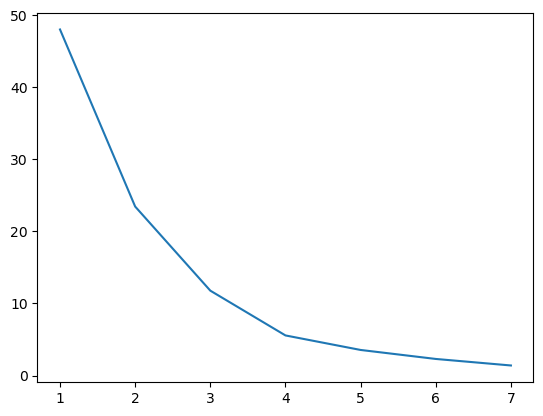

In [204]:
sns.lineplot(y=wcss_try_4,x=range(1,8))

In [205]:
kmeans_try_4=KMeans(n_clusters=4)
kmeans_try_4.fit(x_train_try_4)
df_combine_percentage["cluster_4"]=kmeans_try_4.labels_

In [206]:
df_combine_percentage.iloc[:,:-1]

2021    2021-2022    2022    2022-2023    2023   2023-2024     2024  \
2WIC       6    85.714286      12   353.846154      58  -84.745763        8   
2WN   154500   306.033618  627325    36.784383  858083   57.918456  1355072   
2WT     1834   121.961853    4072   -48.981095    2077   26.900866     2636   
3WN      207   163.942308     548   -53.916211     252   31.620553      332   
3WT   157954   121.392802  349700    66.771613  583201   29.451717   754964   
4WIC       3   225.000000      12   253.846154      45   50.000000       68   
HGV        0  1400.000000      14  2173.333333     340    9.384164      372   
HMV        0     0.000000       0   400.000000       4  -80.000000        0   
HPV      921   111.388286    1948    22.626988    2389  148.075314     5928   
LGV     1084   -41.105991     638   299.530516    2552  323.697611    10816   
LMV    12299   170.357724   33253   120.241174   73238   57.578612   115408   
LPV      736   577.747626    4994    85.685686    9274   84.247978    17088   
MGV        0     0.000000       0   100.000000       1  -50.000000        0   
MMV        0     0.000000       0   700.000000       7  -87.500000        0   
MPV      254   -89.803922      25  1019.230769     290  -77.663230       64   
OTH     1787    39.205817    2488   -88.830856     277  -99.640288        0   

      Total_vehicle  total_percentage_increase  cluster_1  cluster_2  \
2WIC           78.0                 -57.142857          0          1   
2WN       1978676.0                 119.266542          1          0   
2WT          8642.0                 -64.032698          0          1   
3WN          1090.0                 -59.615385          0          1   
3WT       1279596.0                  19.490994          1          0   
4WIC           77.0                 350.000000          0          1   
HGV           447.0                9300.000000          2          2   
HMV             4.0                   0.000000          0          1   
HPV          6740.0                  60.845987          0          1   
LGV          6978.0                 149.308756          0          1   
LMV        147642.0                 134.577236          0          1   
LPV         19276.0                 479.782904          0          1   
MGV             1.0                   0.000000          0          1   
MMV             7.0                   0.000000          0          1   
MPV           585.0                 -93.333333          0          1   
OTH          4552.0                 -99.944072          0          1   

      cluster_3  
2WIC          0  
2WN           1  
2WT           0  
3WN           0  
3WT           1  
4WIC          0  
HGV           0  
HMV           0  
HPV           0  
LGV           0  
LMV           0  
LPV           0  
MGV           0  
MMV           0  
MPV           0  
OTH           0

# By analysing all Four cluster columns we come with this conclusion:- 

<font color="red"> cluster 1:</font>
- Vehicle types in this cluster have varying growth rates, with some experiencing positive increases, while others show fluctuations or declines.
- Examples in this cluster include 2WIC, 2WT, 3WN, 4WIC, HMV, HPV, LGV, LMV, LPV, MGV, MMV, MPV, OTH.

<font color="red"> cluster 2: </font>
- This cluster contains two vehicle type, 2WN, 3WT with very high increases in total numbers over the years.
- The percentage increases for these vehicle type are consistently positive, indicating significant growth.
- Targeting this vehicle type could be advantageous due to its substantial growth rates, suggesting high demand and market potential.

But there are only little more positive choose is for 2WN compare to 3WT.because the growth rate of 2WN is little higher than 3WT.

<font color="red"> cluster 3:</font>
- This group has just one type of vehicle, and it's doing okay. Its numbers are precentage increasing very high  , but not as much as the superstar in Cluster1. 

# Based on this analysis, focusing on 2WN and 3WT, could be a strategic approach for your electric vehicle startup.

# State Cluster

# 1. if we choose 2WN (" Two wheeler Non Transport ")

In [209]:
df_2WN_state=pd.DataFrame()

In [210]:
df_2WN_state["State"]=df_2021["State"]
df_2WN_state["2021"]=df_2021["2WN"]
df_2WN_state["2022"]=df_2022["2WN"]
df_2WN_state["2023"]=df_2023["2WN"]
df_2WN_state["2024"]=df_2024["2WN"]*4

In [211]:
df_2WN_state

State   2021    2022    2023    2024
0   ANDAMAN & NICOBAR ISLAND      0       1       7      36
1             ANDHRA PRADESH   7904   27592   28542   52380
2          ARUNACHAL PRADESH      2       1       3       4
3                      ASSAM    377    1902    2455    7720
4                      BIHAR   2789    9935   12404   24264
5                 CHANDIGARH    197     857    2151    2092
6               CHHATTISGARH   2631   16396   25310   37136
7                      DELHI   7559   34584   37578   49144
8                        GOA    848    4993    8364   15756
9                    GUJARAT   7883   64582   78502   84012
10                   HARYANA   3788   11705    7430   16352
11          HIMACHAL PRADESH    304     944     888    1088
12         JAMMU AND KASHMIR   1130    2132    1835    3664
13                 JHARKHAND   1672    6731    7412    9436
14                 KARNATAKA  27832   82948  132919  208752
15                    KERALA   5850   33439   61786   88500
16                    LADAKH      6      20      18      56
17            MADHYA PRADESH   5102   22423   36792   64204
18               MAHARASHTRA  23672  117556  168041  264760
19                   MANIPUR     20     125      89      92
20                 MEGHALAYA      0      22      73     172
21                   MIZORAM      1      36     166     616
22                  NAGALAND      2       3       3       4
23                    ODISHA   4941   25687   38319   65708
24                PUDUCHERRY    392    1410    2451    5184
25                    PUNJAB   3271    7610    8754   15576
26                 RAJASTHAN  13954   54112   59449   86216
27                TAMIL NADU  23936   61620   78421       0
28                   TRIPURA      3     196     256  131652
29          UT OF DNH AND DD     20      88     100     284
30               UTTARAKHAND   1210    5697    5689     400
31             UTTAR PRADESH   6289   23567   40469    6884
32               WEST BENGAL    915    8411   11407   92128

In [212]:
sc_state=StandardScaler()
x_train_state=sc_state.fit_transform(df_2WN_state.iloc[:,1:])

In [213]:
wcss_state=[]
for i in range(1,10):
    kmean_state=KMeans(n_clusters=i)
    kmean_state.fit(x_train_state)
    kmean_state.inertia_
    wcss_state.append(kmean_state.inertia_)

In [214]:
wcss_state

[132.0,
 47.316407144476756,
 22.267654981584904,
 13.948820785220846,
 9.594470566075612,
 6.119059943481076,
 4.356750180198972,
 3.137388263393579,
 2.3886965315514193]

<Axes: >

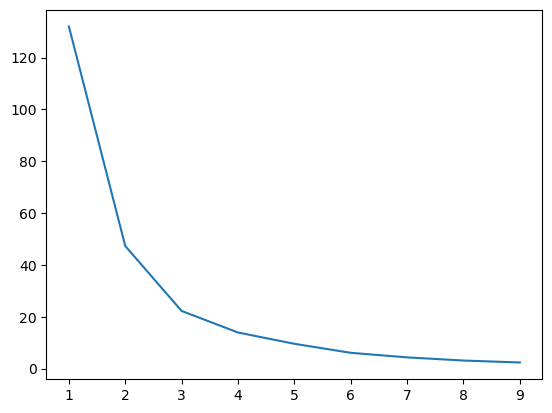

In [215]:
sns.lineplot(y=wcss_state,x=range(1,10))

In [216]:
kmean_state=KMeans(n_clusters=3)
kmean_state.fit(x_train_state)
df_2WN_state["cluster"]=kmean_state.labels_

In [217]:
df_2WN_state

State   2021    2022    2023    2024  cluster
0   ANDAMAN & NICOBAR ISLAND      0       1       7      36        0
1             ANDHRA PRADESH   7904   27592   28542   52380        2
2          ARUNACHAL PRADESH      2       1       3       4        0
3                      ASSAM    377    1902    2455    7720        0
4                      BIHAR   2789    9935   12404   24264        0
5                 CHANDIGARH    197     857    2151    2092        0
6               CHHATTISGARH   2631   16396   25310   37136        0
7                      DELHI   7559   34584   37578   49144        2
8                        GOA    848    4993    8364   15756        0
9                    GUJARAT   7883   64582   78502   84012        2
10                   HARYANA   3788   11705    7430   16352        0
11          HIMACHAL PRADESH    304     944     888    1088        0
12         JAMMU AND KASHMIR   1130    2132    1835    3664        0
13                 JHARKHAND   1672    6731    7412    9436        0
14                 KARNATAKA  27832   82948  132919  208752        1
15                    KERALA   5850   33439   61786   88500        2
16                    LADAKH      6      20      18      56        0
17            MADHYA PRADESH   5102   22423   36792   64204        2
18               MAHARASHTRA  23672  117556  168041  264760        1
19                   MANIPUR     20     125      89      92        0
20                 MEGHALAYA      0      22      73     172        0
21                   MIZORAM      1      36     166     616        0
22                  NAGALAND      2       3       3       4        0
23                    ODISHA   4941   25687   38319   65708        2
24                PUDUCHERRY    392    1410    2451    5184        0
25                    PUNJAB   3271    7610    8754   15576        0
26                 RAJASTHAN  13954   54112   59449   86216        2
27                TAMIL NADU  23936   61620   78421       0        2
28                   TRIPURA      3     196     256  131652        0
29          UT OF DNH AND DD     20      88     100     284        0
30               UTTARAKHAND   1210    5697    5689     400        0
31             UTTAR PRADESH   6289   23567   40469    6884        2
32               WEST BENGAL    915    8411   11407   92128        0

In [344]:
import plotly.express as px
px.scatter_3d(x=df_2WN_state["2021"],y=df_2WN_state["2022"],z=df_2WN_state["2023"],color=df_2WN_state["cluster"])

In [345]:
df_2WN_state[['State','cluster']]

State  cluster
0   ANDAMAN & NICOBAR ISLAND        0
1             ANDHRA PRADESH        2
2          ARUNACHAL PRADESH        0
3                      ASSAM        0
4                      BIHAR        0
5                 CHANDIGARH        0
6               CHHATTISGARH        0
7                      DELHI        2
8                        GOA        0
9                    GUJARAT        2
10                   HARYANA        0
11          HIMACHAL PRADESH        0
12         JAMMU AND KASHMIR        0
13                 JHARKHAND        0
14                 KARNATAKA        1
15                    KERALA        2
16                    LADAKH        0
17            MADHYA PRADESH        2
18               MAHARASHTRA        1
19                   MANIPUR        0
20                 MEGHALAYA        0
21                   MIZORAM        0
22                  NAGALAND        0
23                    ODISHA        2
24                PUDUCHERRY        0
25                    PUNJAB        0
26                 RAJASTHAN        2
27                TAMIL NADU        2
28                   TRIPURA        0
29          UT OF DNH AND DD        0
30               UTTARAKHAND        0
31             UTTAR PRADESH        2
32               WEST BENGAL        0

<font color="red">Cluster 0:</font>

- States in this cluster have relatively low numbers of electric vehicles registered over the years.
- These states might be in the early stages of electric vehicle adoption or have slower growth rates.
- Examples: Andaman & Nicobar Island, Arunachal Pradesh, Assam, Bihar, Chandigarh, Goa, Haryana, Himachal Pradesh, Jammu and Kashmir, Jharkhand, Ladakh, Manipur, Meghalaya, Mizoram, Nagaland, Puducherry, Punjab, Tripura, UT of DNH and DD, Uttarakhand, West Bengal.
    
- Insight: Targeting this cluster could be beneficial for tapping into potential growth areas where electric vehicle adoption is still in its infancy. However, sales might be slower initially compared to more established markets.<br>
    
<font color="red">Cluster 1:</font>

- States in this cluster have moderate to high numbers of electric vehicles registered over the years, indicating steady growth.
- Examples: Karnataka, Maharashtra.
- Insight: This cluster represents mature markets with steady growth trends. While these states have already adopted electric vehicles, there could still be opportunities for further expansion and increasing market share.

<font color="red">Cluster 2: </font>

- States in this cluster have high numbers of electric vehicles registered and significant growth rates over the years.
- Examples: Andhra Pradesh, Delhi, Gujarat, Kerala, Madhya Pradesh, Odisha, Rajasthan, Tamil Nadu, Uttar Pradesh.
- Insight: This cluster represents high-growth markets with considerable demand for electric vehicles. These states offer substantial opportunities for rapid expansion and capturing a significant market share. </font>

# The best target cluster for your electric vehicle startup sales would likely be Cluster 2. Targeting states with high growth rates and significant demand, such as Andhra Pradesh, Delhi, Gujarat, Kerala, Madhya Pradesh, Odisha, Rajasthan, Tamil Nadu, and Uttar Pradesh, can help maximize sales and accelerate the growth of your startup. These states offer a fertile ground for expanding your market presence and establishing a strong foothold in the electric vehicle industry.

# 2. if we choose 3WT (" Three wheeler Transport ")

In [219]:
# then which state we prefer:-

In [358]:
df_3WT_state=pd.DataFrame()

In [359]:
df_3WT_state["State"]=df_2021["State"]
df_3WT_state["2021"]=df_2021["3WT"]
df_3WT_state["2022"]=df_2022["3WT"]
df_3WT_state["2023"]=df_2023["3WT"]
df_3WT_state["2024"]=df_2024["3WT"]

In [365]:
df_3WT_state

State   2021    2022    2023   2024
0   ANDAMAN & NICOBAR ISLAND     30       0       0      0
1             ANDHRA PRADESH    198     133    2099    992
2          ARUNACHAL PRADESH      0       0       0      2
3                      ASSAM  15247   38714   57900  15893
4                      BIHAR  20206   45666   75193  23767
5                 CHANDIGARH    386    1550    3199    912
6               CHHATTISGARH   1510    5571   11356   4031
7                      DELHI  16248   21621   26344  11386
8                        GOA     14      37      40      1
9                    GUJARAT    750    1361    3037   1190
10                   HARYANA   4806   13320   20320   6390
11          HIMACHAL PRADESH     10      18      38     64
12         JAMMU AND KASHMIR     11    2508    7600   2787
13                 JHARKHAND   2019    6794   13229   3997
14                 KARNATAKA   2136    4231    5281   2039
15                    KERALA   1178    2291    4068   1969
16                    LADAKH      0       0       1      0
17            MADHYA PRADESH   4326   11447   29025   9221
18               MAHARASHTRA   1937    6419   11599   4142
19                   MANIPUR     94     215     280     58
20                 MEGHALAYA      2       7      18    228
21                   MIZORAM      0       0       0      0
22                  NAGALAND      0       0       0      0
23                    ODISHA    623    2252    4768   1684
24                PUDUCHERRY      4      25      90     72
25                    PUNJAB   1335    6383   16108   8280
26                 RAJASTHAN   8936   22634   29680   8516
27                TAMIL NADU   4258    2704    5388      0
28                   TRIPURA   2425    3975    6025   1607
29          UT OF DNH AND DD      0      20      16   2442
30               UTTARAKHAND   3982    9455   10616      3
31             UTTAR PRADESH  60125  138575  232609   2737
32               WEST BENGAL   5158    1774    7272  70526

In [366]:
sc_3WT_state=StandardScaler()
x_train_3WT_state=sc_3WT_state.fit_transform(df_3WT_state.iloc[:,1:-1])

In [367]:
wcss_3WT_state=[]
for i in range(1,8):
    kmeans_3WT_state=KMeans(n_clusters=i)
    kmeans_3WT_state.fit(x_train_3WT_state)
    wcss_3WT_state.append(kmeans_3WT_state.inertia_)

In [368]:
wcss_3WT_state

[98.99999999999999,
 18.086082919607076,
 4.246937897736544,
 2.2733184554890835,
 1.2216423006384545,
 0.8294282137179165,
 0.6016855248184664]

<Axes: >

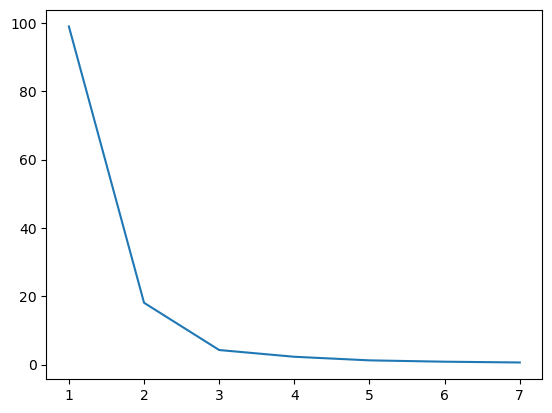

In [369]:
sns.lineplot(y=wcss_3WT_state,x=range(1,8))

In [370]:
kmeans_3WT_state=KMeans(n_clusters=3)
kmeans_3WT_state.fit(x_train_3WT_state)
df_3WT_state['cluster_3WT']=kmeans_3WT_state.labels_

In [371]:
df_3WT_state

State   2021    2022    2023   2024  cluster_3WT
0   ANDAMAN & NICOBAR ISLAND     30       0       0      0            0
1             ANDHRA PRADESH    198     133    2099    992            0
2          ARUNACHAL PRADESH      0       0       0      2            0
3                      ASSAM  15247   38714   57900  15893            2
4                      BIHAR  20206   45666   75193  23767            2
5                 CHANDIGARH    386    1550    3199    912            0
6               CHHATTISGARH   1510    5571   11356   4031            0
7                      DELHI  16248   21621   26344  11386            2
8                        GOA     14      37      40      1            0
9                    GUJARAT    750    1361    3037   1190            0
10                   HARYANA   4806   13320   20320   6390            0
11          HIMACHAL PRADESH     10      18      38     64            0
12         JAMMU AND KASHMIR     11    2508    7600   2787            0
13                 JHARKHAND   2019    6794   13229   3997            0
14                 KARNATAKA   2136    4231    5281   2039            0
15                    KERALA   1178    2291    4068   1969            0
16                    LADAKH      0       0       1      0            0
17            MADHYA PRADESH   4326   11447   29025   9221            0
18               MAHARASHTRA   1937    6419   11599   4142            0
19                   MANIPUR     94     215     280     58            0
20                 MEGHALAYA      2       7      18    228            0
21                   MIZORAM      0       0       0      0            0
22                  NAGALAND      0       0       0      0            0
23                    ODISHA    623    2252    4768   1684            0
24                PUDUCHERRY      4      25      90     72            0
25                    PUNJAB   1335    6383   16108   8280            0
26                 RAJASTHAN   8936   22634   29680   8516            2
27                TAMIL NADU   4258    2704    5388      0            0
28                   TRIPURA   2425    3975    6025   1607            0
29          UT OF DNH AND DD      0      20      16   2442            0
30               UTTARAKHAND   3982    9455   10616      3            0
31             UTTAR PRADESH  60125  138575  232609   2737            1
32               WEST BENGAL   5158    1774    7272  70526            0

In [372]:
df_3WT_state[df_3WT_state["cluster_3WT"]==1]

State   2021    2022    2023  2024  cluster_3WT
31  UTTAR PRADESH  60125  138575  232609  2737            1

In [373]:
df_3WT_state[df_3WT_state["cluster_3WT"]==2]

State   2021   2022   2023   2024  cluster_3WT
3       ASSAM  15247  38714  57900  15893            2
4       BIHAR  20206  45666  75193  23767            2
7       DELHI  16248  21621  26344  11386            2
26  RAJASTHAN   8936  22634  29680   8516            2

In [381]:
df_3WT_state[df_3WT_state["cluster_3WT"]==2]

State   2021   2022   2023   2024  cluster_3WT
3       ASSAM  15247  38714  57900  15893            2
4       BIHAR  20206  45666  75193  23767            2
7       DELHI  16248  21621  26344  11386            2
26  RAJASTHAN   8936  22634  29680   8516            2

In [382]:
df_3WT_state[["State","cluster_3WT"]]

State  cluster_3WT
0   ANDAMAN & NICOBAR ISLAND            0
1             ANDHRA PRADESH            0
2          ARUNACHAL PRADESH            0
3                      ASSAM            2
4                      BIHAR            2
5                 CHANDIGARH            0
6               CHHATTISGARH            0
7                      DELHI            2
8                        GOA            0
9                    GUJARAT            0
10                   HARYANA            0
11          HIMACHAL PRADESH            0
12         JAMMU AND KASHMIR            0
13                 JHARKHAND            0
14                 KARNATAKA            0
15                    KERALA            0
16                    LADAKH            0
17            MADHYA PRADESH            0
18               MAHARASHTRA            0
19                   MANIPUR            0
20                 MEGHALAYA            0
21                   MIZORAM            0
22                  NAGALAND            0
23                    ODISHA            0
24                PUDUCHERRY            0
25                    PUNJAB            0
26                 RAJASTHAN            2
27                TAMIL NADU            0
28                   TRIPURA            0
29          UT OF DNH AND DD            0
30               UTTARAKHAND            0
31             UTTAR PRADESH            1
32               WEST BENGAL            0

<font color="red">Cluster 0: </font>
- States in this cluster generally have lower sales of electric vehicles across all years. They may have relatively lower market demand or slower adoption rates for electric vehicles compared to other clusters.
- Examples include Andaman & Nicobar Island, Arunachal Pradesh, Goa, Himachal Pradesh, and others.<br><br>
<font color="red">Cluster 1:</font> <br>
- Uttar Pradesh is the only state in this cluster. It shows a significant increase in electric vehicle sales from 2021 to 2024, suggesting a potentially high-growth market.
Uttar Pradesh may be an attractive target for your startup due to its substantial growth in electric vehicle sales over the years.<br><br>
<font color="red">Cluster 2:</font> <br>
- States in this cluster exhibit fluctuating sales trends, with some showing significant increases in sales over the years.
- Examples include Assam, Bihar, Delhi, Maharashtra, Rajasthan, and others.
These states may represent markets with potential growth opportunities, although sales trends may vary.<br> </font>

# Based on my analysis for 3WT , if you're looking for immediate growth and potential market penetration, targeting states in Cluster 1 (such as Uttar Pradesh) might be a strategic choice.Cluster 2 states exhibit fluctuating sales trends, indicating potential growth opportunities amidst variability in sales performance. Although sales trends may vary, these states represent markets with latent demand and potential for growth, making them attractive targets for market expansion.

# Data Analysis 

In [383]:
df_analysis=pd.DataFrame()

In [384]:
df_analysis["State"]=df_2021["State"]
df_analysis["Total_2021"]=df_2021["Total"]
df_analysis["Total_2022"]=df_2022["Total"]
df_analysis["Total_2023"]=df_2023["Total"]
df_analysis["Total_2024"]=df_2024["Total"]

In [385]:
df_analysis.head(2)

State  Total_2021  Total_2022  Total_2023  Total_2024
0  ANDAMAN & NICOBAR ISLAND          92          23          26          13
1            ANDHRA PRADESH        9688       29374       32838       14980

In [386]:
df_analysis_2WN=pd.DataFrame(data={
    "State": df_2021["State"],
    "2021": df_2021["2WN"],
    "2022": df_2022["2WN"],
    "2023": df_2023["2WN"],
    "2024": df_2024["2WN"],
})

In [387]:
df_analysis_2WN.head()

State    2021     2022     2023   2024
0  ANDAMAN & NICOBAR ISLAND     0.0      1.0      7.0      9
1            ANDHRA PRADESH  7904.0  27592.0  28542.0  13095
2         ARUNACHAL PRADESH     2.0      1.0      3.0      1
3                     ASSAM   377.0   1902.0   2455.0   1930
4                     BIHAR  2789.0   9935.0  12404.0   6066

In [388]:
df_analysis_3WT=pd.DataFrame(data={
    "State": df_2021["State"],
    "2021": df_2021["3WT"],
    "2022": df_2022["3WT"],
    "2023": df_2023["3WT"],
    "2024": df_2024["3WT"],
})

In [389]:
df_analysis_3WT.head()

State     2021     2022     2023   2024
0  ANDAMAN & NICOBAR ISLAND     30.0      0.0      0.0      0
1            ANDHRA PRADESH    198.0    133.0   2099.0    992
2         ARUNACHAL PRADESH      0.0      0.0      0.0      2
3                     ASSAM  15247.0  38714.0  57900.0  15893
4                     BIHAR  20206.0  45666.0  75193.0  23767

In [390]:
df_analysis_2WN.iloc[:,1:].sum(axis=0)

2021    154500.0
2022    627325.0
2023    858083.0
2024    338768.0
dtype: float64

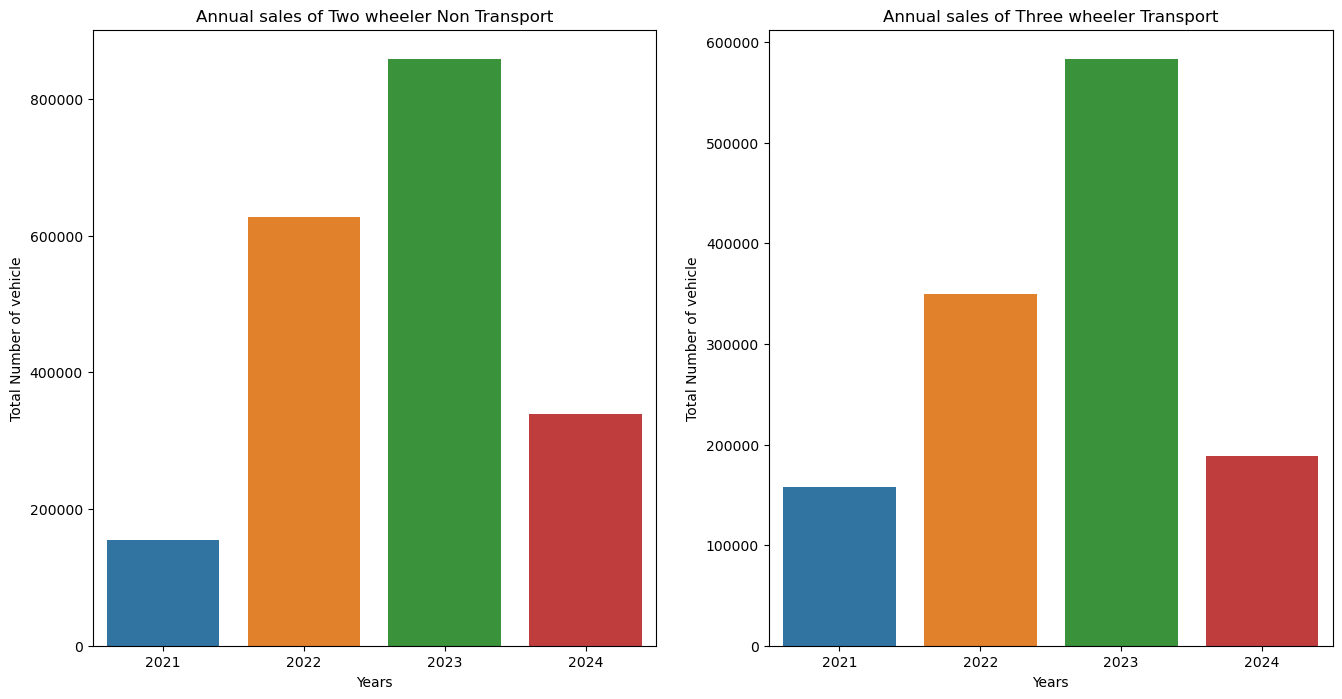

In [391]:
# anually sales of 2WN and 3WT
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.barplot(x=df_analysis_2WN.iloc[:,1:].sum(axis=0).index,y=df_analysis_2WN.iloc[:,1:].sum(axis=0).values)
plt.title("Annual sales of Two wheeler Non Transport")
plt.xlabel("Years")
plt.ylabel("Total Number of vehicle")
plt.subplot(1,2,2)
sns.barplot(x=df_analysis_3WT.iloc[:,1:].sum(axis=0).index,y=df_analysis_3WT.iloc[:,1:].sum(axis=0).values)
plt.title("Annual sales of Three wheeler Transport")
plt.xlabel("Years")
plt.ylabel("Total Number of vehicle")
plt.show()

In [392]:
# Total sale % of this ev

In [393]:
df_analysis.iloc[:,1:].sum(axis=0)[0]

331585

In [394]:
df_analysis.iloc[:,1:].columns[1]

'Total_2022'

In [395]:
df_analysis_2WN.iloc[:,1:].sum(axis=0)[0]

154500.0

In [396]:
df_analysis_3WT.iloc[:,1:].sum(axis=0)[0]

157954.0

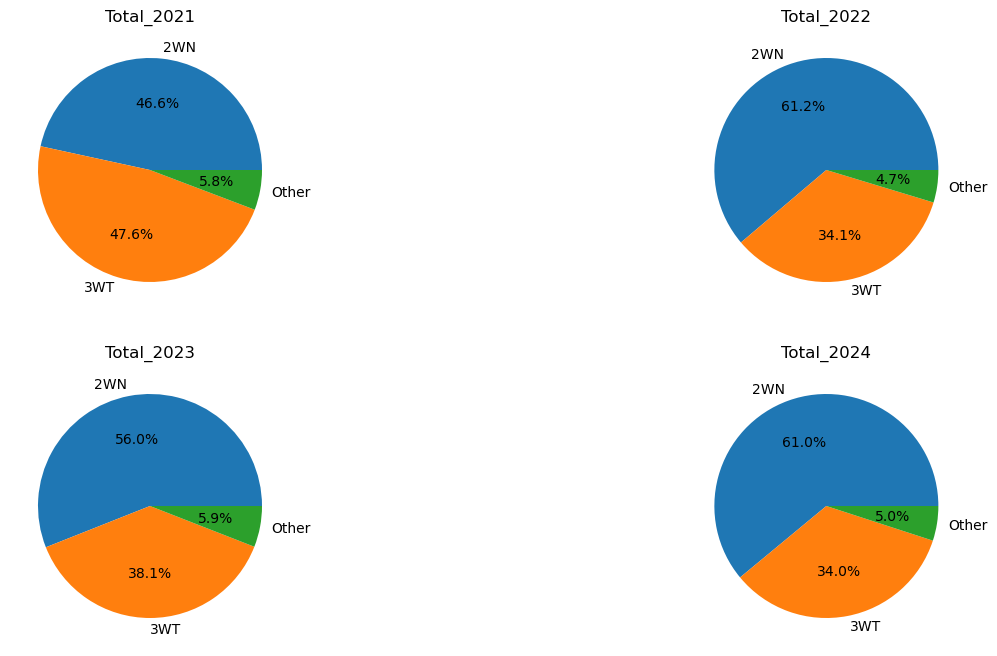

In [397]:
plt.figure(figsize=(16,8))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.pie(x=[df_analysis_2WN.iloc[:,1:].sum(axis=0)[i],df_analysis_3WT.iloc[:,1:].sum(axis=0)[i],df_analysis.iloc[:,1:].sum(axis=0)[i]-df_analysis_2WN.iloc[:,1:].sum(axis=0)[i]-df_analysis_3WT.iloc[:,1:].sum(axis=0)[i]],labels=["2WN","3WT","Other"],autopct="%1.1f%%")
    plt.title(df_analysis.iloc[:,1:].columns[i])
plt.show()

# <font color="red"> Insight :- </font>  Two wheeler Non Transport are ruling the market every year.

In [398]:
df_analysis

State  Total_2021  Total_2022  Total_2023  Total_2024
0   ANDAMAN & NICOBAR ISLAND          92          23          26          13
1             ANDHRA PRADESH        9688       29374       32838       14980
2          ARUNACHAL PRADESH           2           2          21          16
3                      ASSAM       15632       40705       60798       18026
4                      BIHAR       23083       55751       88216       30144
5                 CHANDIGARH         734        2721        6408        1879
6               CHHATTISGARH        4215       22365       38220       13786
7                      DELHI       25815       62257       73649       27714
8                        GOA        1096        5687        9481        4405
9                    GUJARAT        9765       68994       88617       24709
10                   HARYANA        8660       25862       30488       11793
11          HIMACHAL PRADESH         326        1007        1128         411
12         JAMMU AND KASHMIR        1146        4690        9749        3816
13                 JHARKHAND        3741       13682       21126        6539
14                 KARNATAKA       33304       95856      152631       60002
15                    KERALA        8734       39618       75791       27556
16                    LADAKH           6          40          28          14
17            MADHYA PRADESH       10438       36809       67927       26072
18               MAHARASHTRA       29914      136040      194383       76383
19                   MANIPUR         114         341         399         100
20                 MEGHALAYA           5          41         114         459
21                   MIZORAM           1          36         166         155
22                  NAGALAND           2           3           6           5
23                    ODISHA        5626       28443       44550       19112
24                PUDUCHERRY         405        1481        2638        1424
25                    PUNJAB        4643       14055       25738       12849
26                 RAJASTHAN       23464       78248       93765       32133
27                TAMIL NADU       30030       66998       90294           1
28                   TRIPURA        2434        4178        6312       37626
29          UT OF DNH AND DD          29         141         161        2530
30               UTTARAKHAND        5324       15560       16796         135
31             UTTAR PRADESH       66708      162870      278173        4641
32               WEST BENGAL        6409       11151       21433       95875

In [399]:
df_analysis_2WN

State     2021      2022      2023   2024
0   ANDAMAN & NICOBAR ISLAND      0.0       1.0       7.0      9
1             ANDHRA PRADESH   7904.0   27592.0   28542.0  13095
2          ARUNACHAL PRADESH      2.0       1.0       3.0      1
3                      ASSAM    377.0    1902.0    2455.0   1930
4                      BIHAR   2789.0    9935.0   12404.0   6066
5                 CHANDIGARH    197.0     857.0    2151.0    523
6               CHHATTISGARH   2631.0   16396.0   25310.0   9284
7                      DELHI   7559.0   34584.0   37578.0  12286
8                        GOA    848.0    4993.0    8364.0   3939
9                    GUJARAT   7883.0   64582.0   78502.0  21003
10                   HARYANA   3788.0   11705.0    7430.0   4088
11          HIMACHAL PRADESH    304.0     944.0     888.0    272
12         JAMMU AND KASHMIR   1130.0    2132.0    1835.0    916
13                 JHARKHAND   1672.0    6731.0    7412.0   2359
14                 KARNATAKA  27832.0   82948.0  132919.0  52188
15                    KERALA   5850.0   33439.0   61786.0  22125
16                    LADAKH      6.0      20.0      18.0     14
17            MADHYA PRADESH   5102.0   22423.0   36792.0  16051
18               MAHARASHTRA  23672.0  117556.0  168041.0  66190
19                   MANIPUR     20.0     125.0      89.0     23
20                 MEGHALAYA      0.0      22.0      73.0     43
21                   MIZORAM      1.0      36.0     166.0    154
22                  NAGALAND      2.0       3.0       3.0      1
23                    ODISHA   4941.0   25687.0   38319.0  16427
24                PUDUCHERRY    392.0    1410.0    2451.0   1296
25                    PUNJAB   3271.0    7610.0    8754.0   3894
26                 RAJASTHAN  13954.0   54112.0   59449.0  21554
27                TAMIL NADU  23936.0   61620.0   78421.0      0
28                   TRIPURA      3.0     196.0     256.0  32913
29          UT OF DNH AND DD     20.0      88.0     100.0     71
30               UTTARAKHAND   1210.0    5697.0    5689.0    100
31             UTTAR PRADESH   6289.0   23567.0   40469.0   1721
32               WEST BENGAL    915.0    8411.0   11407.0  23032
33                       NaN      NaN       NaN       NaN   5200

In [400]:
df_analysis["2WN_T%_2021"]=(df_analysis_2WN["2021"]*100)/df_analysis["Total_2021"]
df_analysis["2WN_T%_2022"]=(df_analysis_2WN["2022"]*100)/df_analysis["Total_2022"]
df_analysis["2WN_T%_2023"]=(df_analysis_2WN["2023"]*100)/df_analysis["Total_2023"]

In [401]:
df_analysis["3WT_T%_2021"]=(df_analysis_3WT["2021"]*100)/df_analysis["Total_2021"]
df_analysis["3WT_T%_2022"]=(df_analysis_3WT["2022"]*100)/df_analysis["Total_2022"]
df_analysis["3WT_T%_2023"]=(df_analysis_3WT["2023"]*100)/df_analysis["Total_2023"]

In [402]:
df_analysis

State  Total_2021  Total_2022  Total_2023  Total_2024  \
0   ANDAMAN & NICOBAR ISLAND          92          23          26          13   
1             ANDHRA PRADESH        9688       29374       32838       14980   
2          ARUNACHAL PRADESH           2           2          21          16   
3                      ASSAM       15632       40705       60798       18026   
4                      BIHAR       23083       55751       88216       30144   
5                 CHANDIGARH         734        2721        6408        1879   
6               CHHATTISGARH        4215       22365       38220       13786   
7                      DELHI       25815       62257       73649       27714   
8                        GOA        1096        5687        9481        4405   
9                    GUJARAT        9765       68994       88617       24709   
10                   HARYANA        8660       25862       30488       11793   
11          HIMACHAL PRADESH         326        1007        1128         411   
12         JAMMU AND KASHMIR        1146        4690        9749        3816   
13                 JHARKHAND        3741       13682       21126        6539   
14                 KARNATAKA       33304       95856      152631       60002   
15                    KERALA        8734       39618       75791       27556   
16                    LADAKH           6          40          28          14   
17            MADHYA PRADESH       10438       36809       67927       26072   
18               MAHARASHTRA       29914      136040      194383       76383   
19                   MANIPUR         114         341         399         100   
20                 MEGHALAYA           5          41         114         459   
21                   MIZORAM           1          36         166         155   
22                  NAGALAND           2           3           6           5   
23                    ODISHA        5626       28443       44550       19112   
24                PUDUCHERRY         405        1481        2638        1424   
25                    PUNJAB        4643       14055       25738       12849   
26                 RAJASTHAN       23464       78248       93765       32133   
27                TAMIL NADU       30030       66998       90294           1   
28                   TRIPURA        2434        4178        6312       37626   
29          UT OF DNH AND DD          29         141         161        2530   
30               UTTARAKHAND        5324       15560       16796         135   
31             UTTAR PRADESH       66708      162870      278173        4641   
32               WEST BENGAL        6409       11151       21433       95875   

    2WN_T%_2021  2WN_T%_2022  2WN_T%_2023  3WT_T%_2021  3WT_T%_2022  \
0      0.000000     4.347826    26.923077    32.608696     0.000000   
1     81.585467    93.933410    86.917595     2.043765     0.452781   
2    100.000000    50.000000    14.285714     0.000000     0.000000   
3      2.411720     4.672645     4.037962    97.537103    95.108709   
4     12.082485    17.820308    14.060941    87.536282    81.910638   
5     26.839237    31.495774    33.567416    52.588556    56.964351   
6     62.419929    73.310977    66.221873    35.824437    24.909457   
7     29.281426    55.550380    51.023096    62.940151    34.728625   
8     77.372263    87.796729    88.218542     1.277372     0.650607   
9     80.727087    93.605241    88.585712     7.680492     1.972635   
10    43.741339    45.259454    24.370244    55.496536    51.504137   
11    93.251534    93.743793    78.723404     3.067485     1.787488   
12    98.603839    45.458422    18.822443     0.959860    53.475480   
13    44.693932    49.196024    35.084730    53.969527    49.656483   
14    83.569541    86.533968    87.085192     6.413644     4.413913   
15    66.979620    84.403554    81.521553    13.487520     5.782725   
16   100.000000    50.000000    64.285714     0.000000     0.000000   
17    48.879096    60.91

In [403]:
df_analysis.State.index

RangeIndex(start=0, stop=33, step=1)

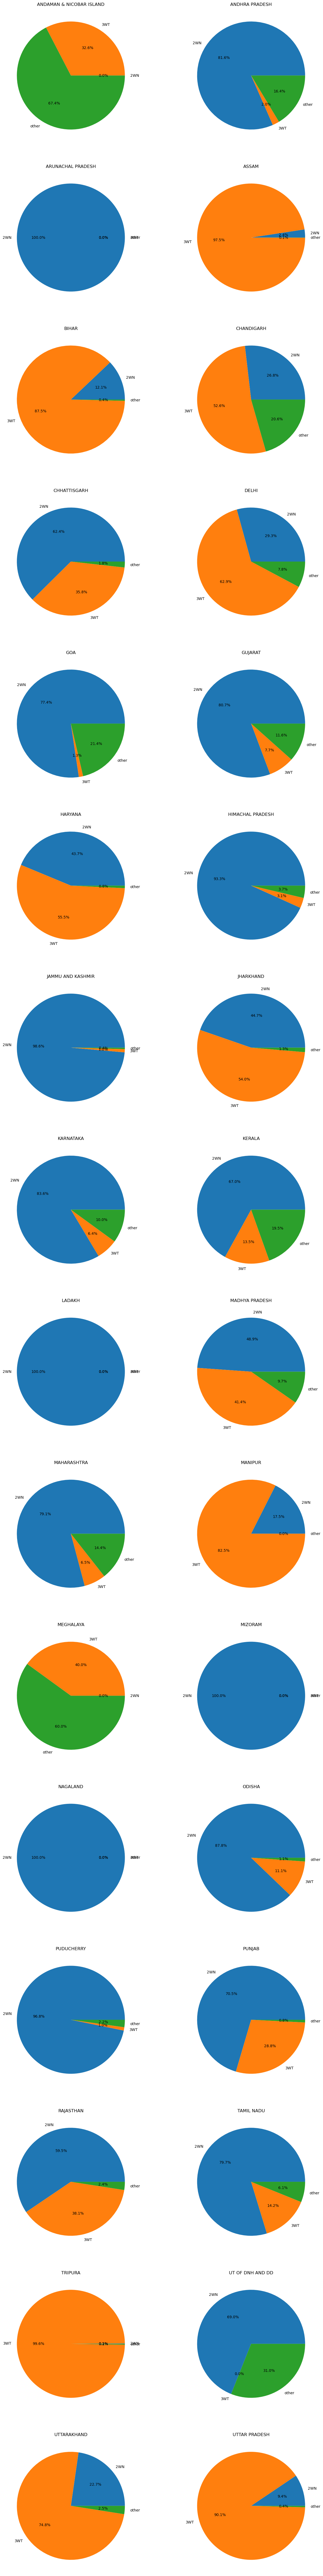

In [404]:
plt.figure(figsize=(16,125))
for i in range(0,32):
    a=df_analysis["2WN_T%_2021"][i]
    b=df_analysis["3WT_T%_2021"][i]
    c=100-(df_analysis["2WN_T%_2021"][i]+df_analysis["3WT_T%_2021"][i])
    plt.subplot(16,2,i+1)
    plt.pie(x=[a,b,c],labels=["2WN","3WT","other"],autopct="%1.1f%%")
    plt.title(df_analysis["State"][i])
plt.show()

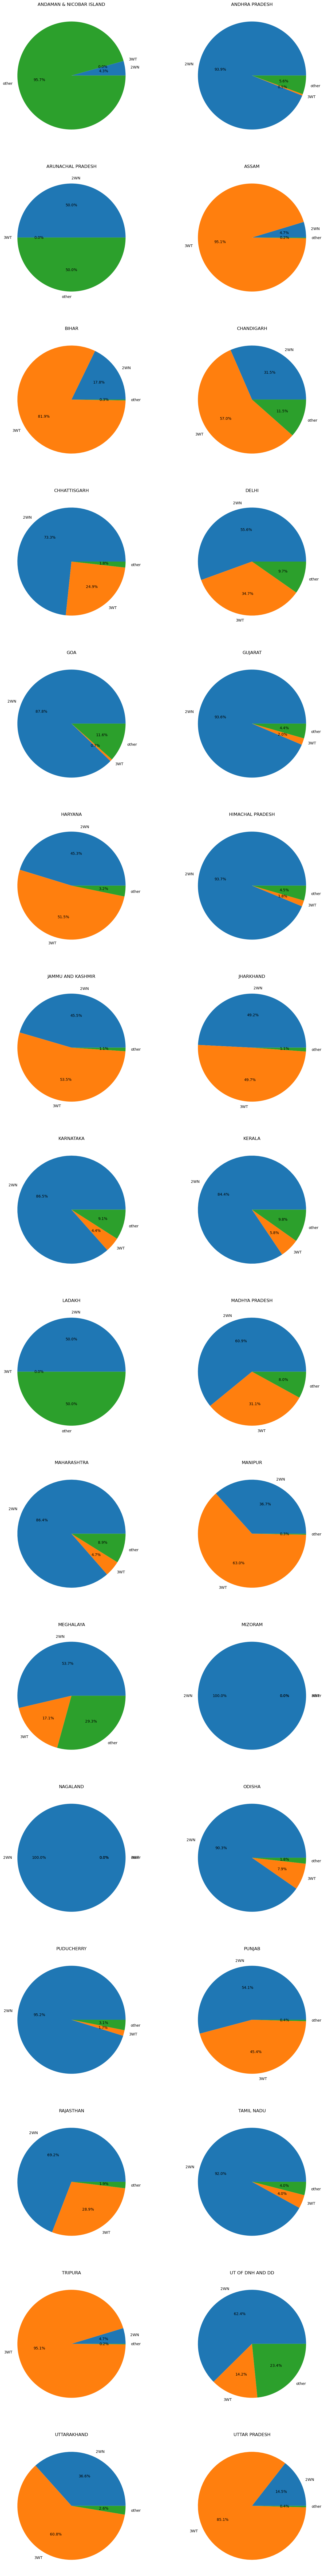

In [405]:
plt.figure(figsize=(16,125))
for i in range(0,32):
    a=df_analysis["2WN_T%_2022"][i]
    b=df_analysis["3WT_T%_2022"][i]
    c=100-(df_analysis["2WN_T%_2022"][i]+df_analysis["3WT_T%_2022"][i])
    plt.subplot(16,2,i+1)
    plt.pie(x=[a,b,c],labels=["2WN","3WT","other"],autopct="%1.1f%%")
    plt.title(df_analysis["State"][i])
plt.show()

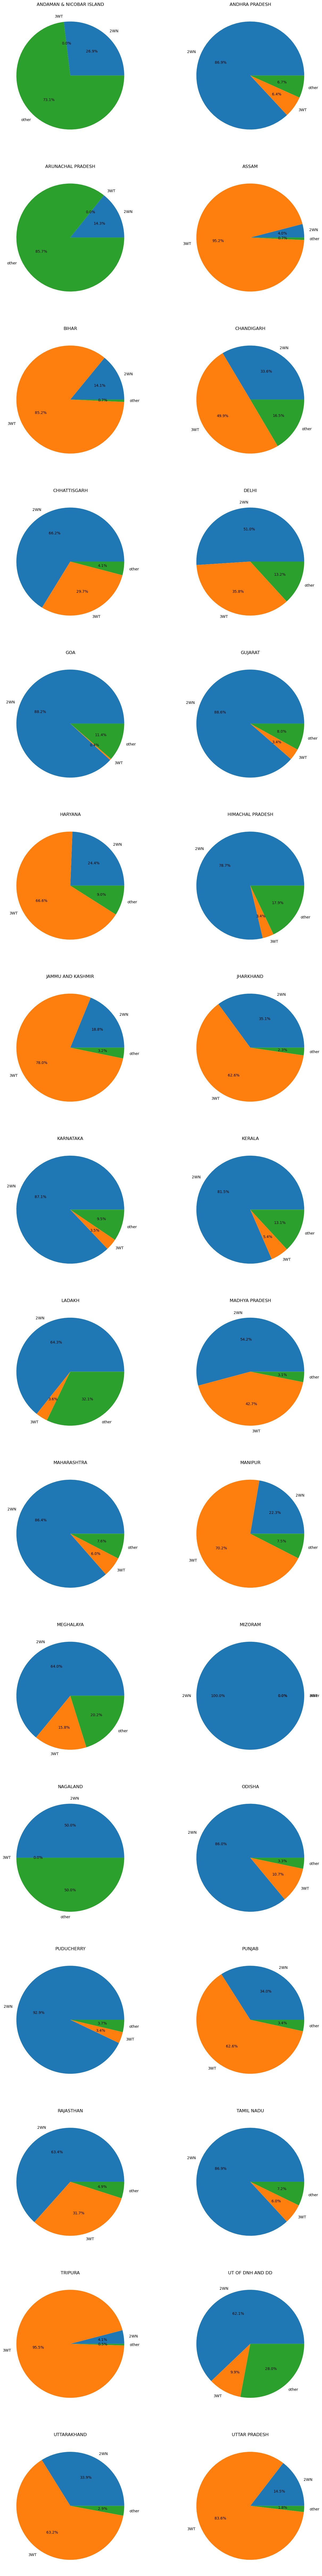

In [406]:
plt.figure(figsize=(16,125))
for i in range(0,32):
    a=df_analysis["2WN_T%_2023"][i]
    b=df_analysis["3WT_T%_2023"][i]
    c=100-(df_analysis["2WN_T%_2023"][i]+df_analysis["3WT_T%_2023"][i])
    plt.subplot(16,2,i+1)
    plt.pie(x=[a,b,c],labels=["2WN","3WT","other"],autopct="%1.1f%%")
    plt.title(df_analysis["State"][i])
plt.show()